In [ ]:
import os
import sys

os.chdir(os.path.dirname(os.path.abspath(sys.argv[0])))

In [36]:
def similarity(embeddings):
    similarity_matrix = torch.zeros((embeddings.size(0), embeddings.size(0)))
    batch_size = 1  
    for i in range(0, embeddings.size(0), batch_size):
        end_i = i + batch_size
        batch_i = embeddings[i:end_i]
        similarity = F.cosine_similarity(batch_i.unsqueeze(1), embeddings.unsqueeze(0), dim=-1)
        similarity_matrix[i:end_i, :] = similarity
    mask = torch.ones(similarity_matrix.shape, dtype=bool)
    mask.fill_diagonal_(0)
    filtered_similarity = similarity_matrix.masked_select(mask).view(embeddings.size(0), -1)
    top1_nn_sim = torch.topk(filtered_similarity, 1, largest=True).values.mean()
    top5_nn_sim = torch.topk(filtered_similarity, 5, largest=True).values.mean()

    distance_matrix = torch.tensor(euclidean_distances(embeddings.cpu().numpy()))
    mask = torch.ones(distance_matrix.shape, dtype=bool)
    mask.fill_diagonal_(0)
    filtered_distance = distance_matrix.masked_select(mask).view(embeddings.size(0), -1)
    top1_nn_distance = torch.topk(filtered_distance, 1, largest=False).values.mean()
    top5_nn_distance = torch.topk(filtered_distance, 5, largest=False).values.mean()

    print("**"*20)
    print(
        f"\tCos Sim: {filtered_similarity.mean()}, NN Cos Sim: {top1_nn_sim}, 5-NN Cos Sim: {top5_nn_sim}, EU Distance: {filtered_distance.mean()}, NN EU Distance: {top1_nn_distance}, 5-NN EU Distance: {top5_nn_distance}"
    )


paths = (
    "../pool_evolve/ap_outputs/1213_mean_quality_ratio_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_1_3k/WizardLM_alpaca.pth",
)

for path in paths:
    data = torch.load(path)
    if type(data) is dict:
        data = data['data']
    embeddings = torch.cat([item['embedding'].unsqueeze(0) for item in data], dim=0).cuda()
    similarity(embeddings[:1000])
    similarity(embeddings[1000:2000])
    similarity(embeddings[2000:3000])
    print("--"*40)

****************************************
	Cos Sim: 0.747461199760437, NN Cos Sim: 0.8820888996124268, 5-NN Cos Sim: 0.8707232475280762, EU Distance: 85.14508056640625, NN EU Distance: 58.31825637817383, 5-NN EU Distance: 61.063270568847656


****************************************
	Cos Sim: 0.8019813895225525, NN Cos Sim: 0.9060932397842407, 5-NN Cos Sim: 0.8964487314224243, EU Distance: 76.54928588867188, NN EU Distance: 52.71780014038086, 5-NN EU Distance: 55.38035583496094
****************************************
	Cos Sim: 0.8124034404754639, NN Cos Sim: 0.9135205745697021, 5-NN Cos Sim: 0.9038540124893188, EU Distance: 74.39170837402344, NN EU Distance: 50.52812576293945, 5-NN EU Distance: 53.25831985473633
--------------------------------------------------------------------------------


SignificanceResult(statistic=0.7065325305325305, pvalue=4.901104521756888e-152)
SignificanceResult(statistic=-0.2822989742989743, pvalue=8.895621056183532e-20)
tensor(0.4726)
tensor(4.9263, dtype=torch.float64)
tensor(0.3997)
tensor(5.1793, dtype=torch.float64)
****************************************
SignificanceResult(statistic=0.3393257553257553, pvalue=2.281909298653766e-28)
SignificanceResult(statistic=-0.06187405387405387, pvalue=0.05045848918643353)
tensor(0.3419)
tensor(5.1807, dtype=torch.float64)
tensor(0.3311)
tensor(5.2416, dtype=torch.float64)
****************************************
SignificanceResult(statistic=0.18074026874026874, pvalue=8.621867488775675e-09)
SignificanceResult(statistic=0.03113157113157113, pvalue=0.32537430184258487)
tensor(0.3154)
tensor(5.1743, dtype=torch.float64)
tensor(0.3070)
tensor(5.2262, dtype=torch.float64)
****************************************


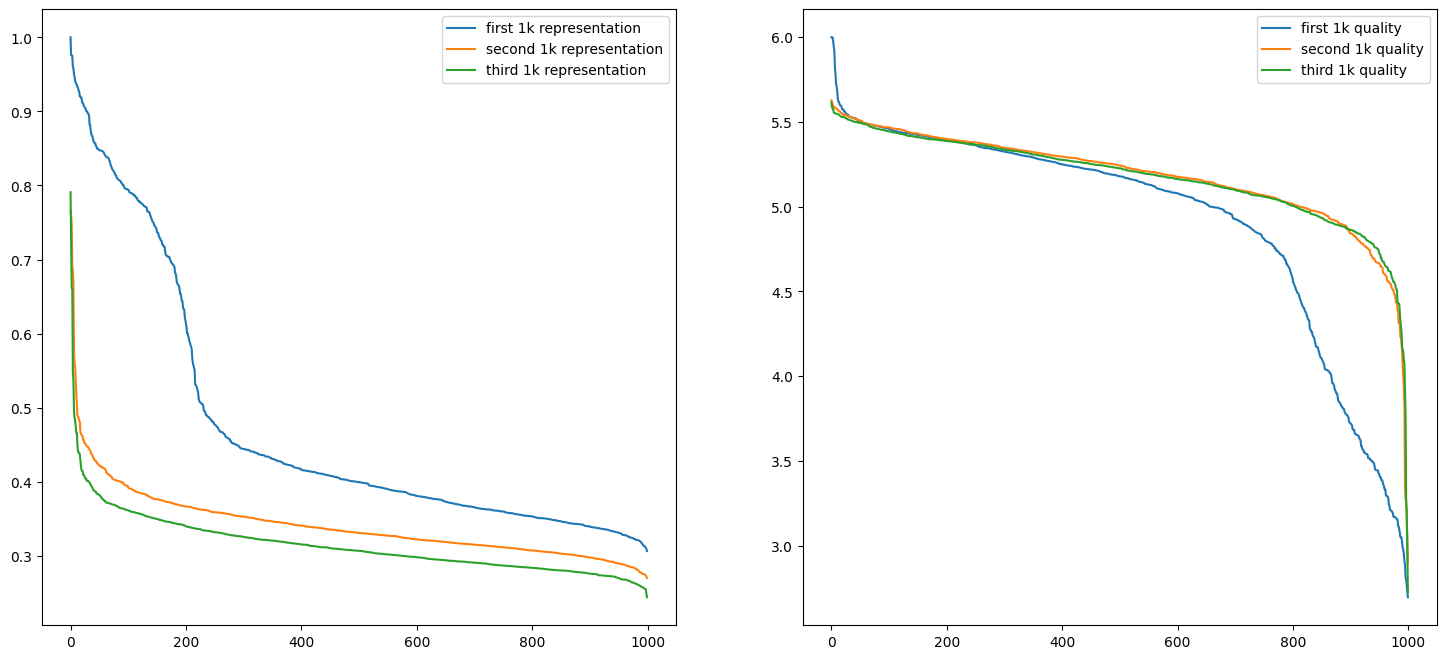

In [25]:
paths = (
    "../pool_evolve/ap_outputs/1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_1.0_6k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_2.0_6k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_1.0_6k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_2.0_6k/WizardLM_alpaca.pth",
)

path = paths[0]
data = torch.load(path)

representation_scores = data['representative_scores']
quality_scores = data['quality_scores']
overall_scores = data['overall_scores']
sorted_indices = overall_scores.sort(descending=True).indices 

print(spearmanr(overall_scores[sorted_indices][:1000], representation_scores[sorted_indices][:1000]))
print(spearmanr(overall_scores[sorted_indices][:1000], quality_scores[sorted_indices][:1000]))
print(representation_scores[sorted_indices][:1000].mean())
print(quality_scores[sorted_indices][:1000].mean())
print(representation_scores[sorted_indices][:1000].median())
print(quality_scores[sorted_indices][:1000].median())
print("**"*20)

print(spearmanr(overall_scores[sorted_indices][1000:2000], representation_scores[sorted_indices][1000:2000]))
print(spearmanr(overall_scores[sorted_indices][1000:2000], quality_scores[sorted_indices][1000:2000]))
print(representation_scores[sorted_indices][1000:2000].mean())
print(quality_scores[sorted_indices][1000:2000].mean())
print(representation_scores[sorted_indices][1000:2000].median())
print(quality_scores[sorted_indices][1000:2000].median())
print("**"*20)

print(spearmanr(overall_scores[sorted_indices][2000:3000], representation_scores[sorted_indices][2000:3000]))
print(spearmanr(overall_scores[sorted_indices][2000:3000], quality_scores[sorted_indices][2000:3000]))
print(representation_scores[sorted_indices][2000:3000].mean())
print(quality_scores[sorted_indices][2000:3000].mean())
print(representation_scores[sorted_indices][2000:3000].median())
print(quality_scores[sorted_indices][2000:3000].median())
print("**"*20)


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes[0].plot(representation_scores[sorted_indices][:1000].sort(descending=True).values, label="first 1k representation")
axes[0].plot(representation_scores[sorted_indices][1000:2000].sort(descending=True).values, label="second 1k representation")
axes[0].plot(representation_scores[sorted_indices][2000:3000].sort(descending=True).values, label="third 1k representation")
axes[0].legend()

axes[1].plot(quality_scores[sorted_indices][:1000].sort(descending=True).values, label="first 1k quality")
axes[1].plot(quality_scores[sorted_indices][1000:2000].sort(descending=True).values, label="second 1k quality")
axes[1].plot(quality_scores[sorted_indices][2000:3000].sort(descending=True).values, label="third 1k quality")
axes[1].legend()

plt.show()

SignificanceResult(statistic=0.5977566715499416, pvalue=6.557058675693967e-98)
SignificanceResult(statistic=-0.000798888798888799, pvalue=0.9798703203454904)
tensor(0.3780)
tensor(5.3114, dtype=torch.float64)
tensor(0.3470)
tensor(5.3640, dtype=torch.float64)
****************************************
SignificanceResult(statistic=0.21942413142413142, pvalue=2.2864726131874464e-12)
SignificanceResult(statistic=0.024488712488712493, pvalue=0.43919781978932293)
tensor(0.2997)
tensor(5.3257, dtype=torch.float64)
tensor(0.2929)
tensor(5.3449, dtype=torch.float64)
****************************************
SignificanceResult(statistic=0.13226956826956826, pvalue=2.7173266486052506e-05)
SignificanceResult(statistic=0.023482703482703485, pvalue=0.45823166872771126)
tensor(0.2803)
tensor(5.3013, dtype=torch.float64)
tensor(0.2734)
tensor(5.3206, dtype=torch.float64)
****************************************


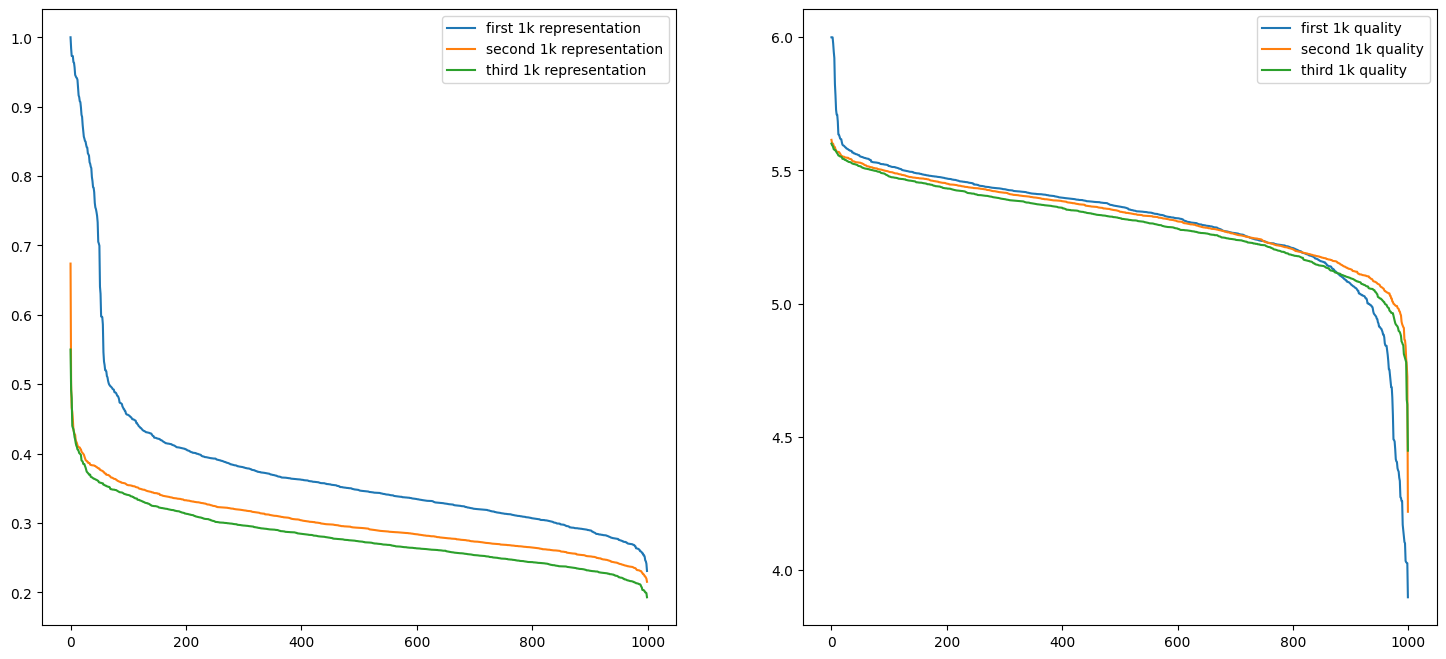

In [26]:
paths = (
    "../pool_evolve/ap_outputs/1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_1.0_6k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_2.0_6k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_1.0_6k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_2.0_6k/WizardLM_alpaca.pth",
)

path = paths[1]
data = torch.load(path)

representation_scores = data['representative_scores']
quality_scores = data['quality_scores']
overall_scores = data['overall_scores']
sorted_indices = overall_scores.sort(descending=True).indices 

print(spearmanr(overall_scores[sorted_indices][:1000], representation_scores[sorted_indices][:1000]))
print(spearmanr(overall_scores[sorted_indices][:1000], quality_scores[sorted_indices][:1000]))
print(representation_scores[sorted_indices][:1000].mean())
print(quality_scores[sorted_indices][:1000].mean())
print(representation_scores[sorted_indices][:1000].median())
print(quality_scores[sorted_indices][:1000].median())
print("**"*20)

print(spearmanr(overall_scores[sorted_indices][1000:2000], representation_scores[sorted_indices][1000:2000]))
print(spearmanr(overall_scores[sorted_indices][1000:2000], quality_scores[sorted_indices][1000:2000]))
print(representation_scores[sorted_indices][1000:2000].mean())
print(quality_scores[sorted_indices][1000:2000].mean())
print(representation_scores[sorted_indices][1000:2000].median())
print(quality_scores[sorted_indices][1000:2000].median())
print("**"*20)

print(spearmanr(overall_scores[sorted_indices][2000:3000], representation_scores[sorted_indices][2000:3000]))
print(spearmanr(overall_scores[sorted_indices][2000:3000], quality_scores[sorted_indices][2000:3000]))
print(representation_scores[sorted_indices][2000:3000].mean())
print(quality_scores[sorted_indices][2000:3000].mean())
print(representation_scores[sorted_indices][2000:3000].median())
print(quality_scores[sorted_indices][2000:3000].median())
print("**"*20)


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes[0].plot(representation_scores[sorted_indices][:1000].sort(descending=True).values, label="first 1k representation")
axes[0].plot(representation_scores[sorted_indices][1000:2000].sort(descending=True).values, label="second 1k representation")
axes[0].plot(representation_scores[sorted_indices][2000:3000].sort(descending=True).values, label="third 1k representation")
axes[0].legend()

axes[1].plot(quality_scores[sorted_indices][:1000].sort(descending=True).values, label="first 1k quality")
axes[1].plot(quality_scores[sorted_indices][1000:2000].sort(descending=True).values, label="second 1k quality")
axes[1].plot(quality_scores[sorted_indices][2000:3000].sort(descending=True).values, label="third 1k quality")
axes[1].legend()

plt.show()

SignificanceResult(statistic=0.690920730920731, pvalue=8.724350084398375e-143)
SignificanceResult(statistic=-0.24925223725223727, pvalue=1.2567477585913157e-15)
tensor(0.4276)
tensor(5.0922, dtype=torch.float64)
tensor(0.3663)
tensor(5.2832, dtype=torch.float64)
****************************************
SignificanceResult(statistic=0.2271732058547255, pvalue=3.5916488735107336e-13)
SignificanceResult(statistic=0.02943010143010143, pvalue=0.35252700194993136)
tensor(0.3153)
tensor(5.2607, dtype=torch.float64)
tensor(0.3060)
tensor(5.3014, dtype=torch.float64)
****************************************
SignificanceResult(statistic=0.13701883701883702, pvalue=1.373726982292411e-05)
SignificanceResult(statistic=0.05010211410211411, pvalue=0.11333468906816255)
tensor(0.2888)
tensor(5.2607, dtype=torch.float64)
tensor(0.2809)
tensor(5.2983, dtype=torch.float64)
****************************************


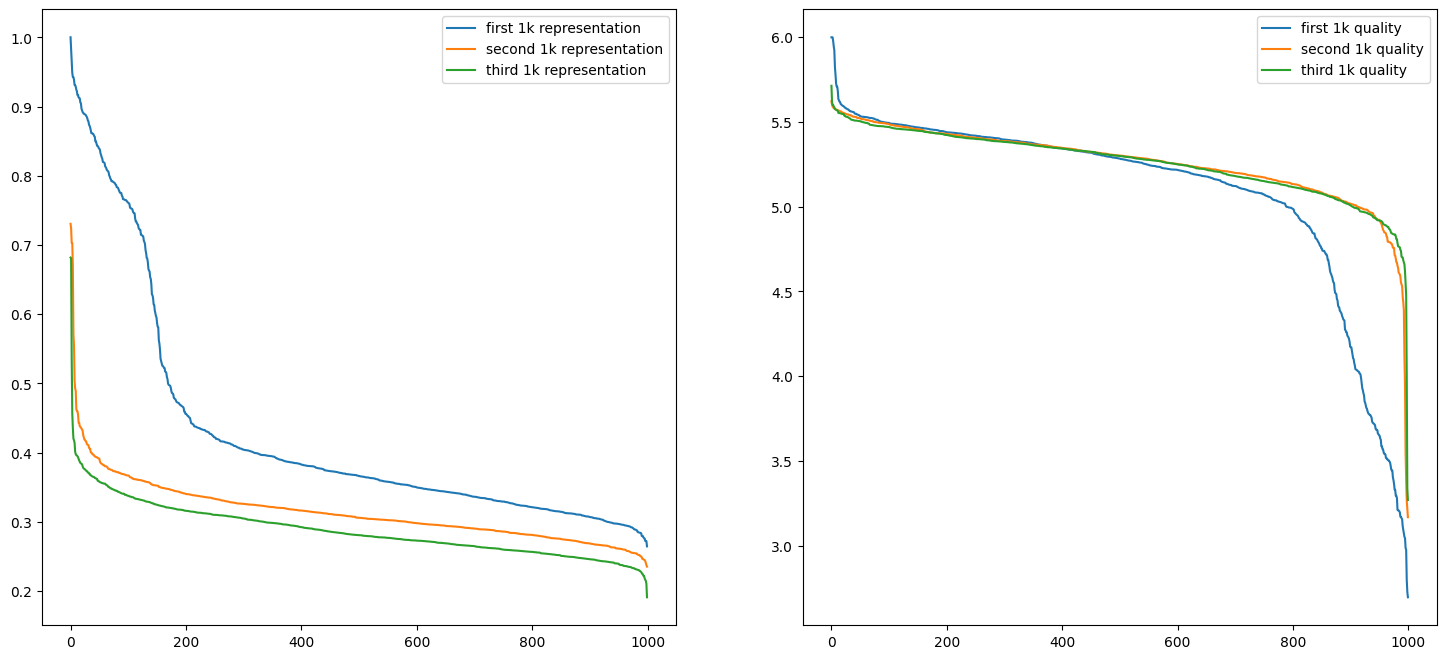

In [27]:
paths = (
    "../pool_evolve/ap_outputs/1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_1.0_6k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_2.0_6k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_1.0_6k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_2.0_6k/WizardLM_alpaca.pth",
)

path = paths[2]
data = torch.load(path)

representation_scores = data['representative_scores']
quality_scores = data['quality_scores']
overall_scores = data['overall_scores']
sorted_indices = overall_scores.sort(descending=True).indices 

print(spearmanr(overall_scores[sorted_indices][:1000], representation_scores[sorted_indices][:1000]))
print(spearmanr(overall_scores[sorted_indices][:1000], quality_scores[sorted_indices][:1000]))
print(representation_scores[sorted_indices][:1000].mean())
print(quality_scores[sorted_indices][:1000].mean())
print(representation_scores[sorted_indices][:1000].median())
print(quality_scores[sorted_indices][:1000].median())
print("**"*20)

print(spearmanr(overall_scores[sorted_indices][1000:2000], representation_scores[sorted_indices][1000:2000]))
print(spearmanr(overall_scores[sorted_indices][1000:2000], quality_scores[sorted_indices][1000:2000]))
print(representation_scores[sorted_indices][1000:2000].mean())
print(quality_scores[sorted_indices][1000:2000].mean())
print(representation_scores[sorted_indices][1000:2000].median())
print(quality_scores[sorted_indices][1000:2000].median())
print("**"*20)

print(spearmanr(overall_scores[sorted_indices][2000:3000], representation_scores[sorted_indices][2000:3000]))
print(spearmanr(overall_scores[sorted_indices][2000:3000], quality_scores[sorted_indices][2000:3000]))
print(representation_scores[sorted_indices][2000:3000].mean())
print(quality_scores[sorted_indices][2000:3000].mean())
print(representation_scores[sorted_indices][2000:3000].median())
print(quality_scores[sorted_indices][2000:3000].median())
print("**"*20)


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes[0].plot(representation_scores[sorted_indices][:1000].sort(descending=True).values, label="first 1k representation")
axes[0].plot(representation_scores[sorted_indices][1000:2000].sort(descending=True).values, label="second 1k representation")
axes[0].plot(representation_scores[sorted_indices][2000:3000].sort(descending=True).values, label="third 1k representation")
axes[0].legend()

axes[1].plot(quality_scores[sorted_indices][:1000].sort(descending=True).values, label="first 1k quality")
axes[1].plot(quality_scores[sorted_indices][1000:2000].sort(descending=True).values, label="second 1k quality")
axes[1].plot(quality_scores[sorted_indices][2000:3000].sort(descending=True).values, label="third 1k quality")
axes[1].legend()

plt.show()

SignificanceResult(statistic=0.551037599037599, pvalue=1.7116341231313766e-80)
SignificanceResult(statistic=0.06341229941229941, pvalue=0.04498626682782112)
tensor(0.3655)
tensor(5.3753, dtype=torch.float64)
tensor(0.3399)
tensor(5.4079, dtype=torch.float64)
****************************************
SignificanceResult(statistic=0.12778092816427095, pvalue=5.0704346193735396e-05)
SignificanceResult(statistic=0.07439672639672641, pvalue=0.01862514128998243)
tensor(0.2932)
tensor(5.3715, dtype=torch.float64)
tensor(0.2843)
tensor(5.3925, dtype=torch.float64)
****************************************
SignificanceResult(statistic=0.10978798978798979, pvalue=0.00050521298496819)
SignificanceResult(statistic=0.028443448443448444, pvalue=0.368909649016843)
tensor(0.2751)
tensor(5.3492, dtype=torch.float64)
tensor(0.2681)
tensor(5.3684, dtype=torch.float64)
****************************************


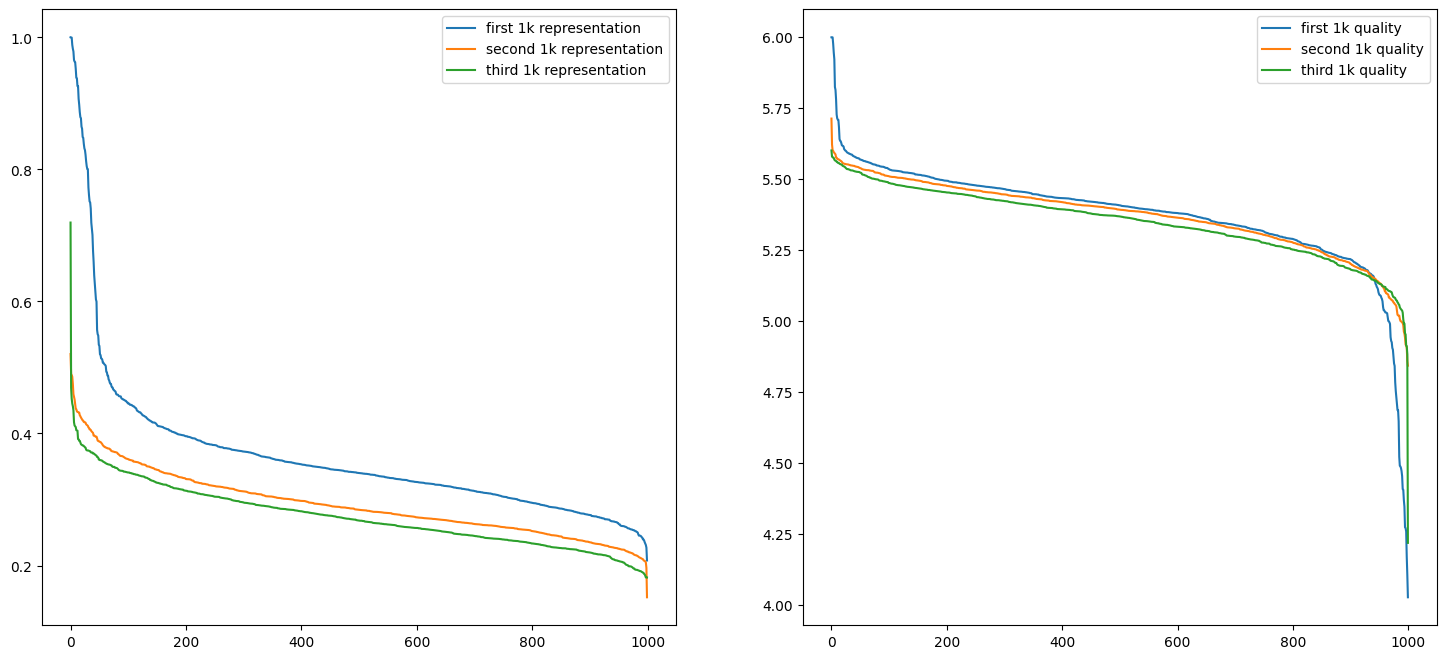

In [28]:
paths = (
    "../pool_evolve/ap_outputs/1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_1.0_6k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_2.0_6k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_1.0_6k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_2.0_6k/WizardLM_alpaca.pth",
)

path = paths[3]
data = torch.load(path)

representation_scores = data['representative_scores']
quality_scores = data['quality_scores']
overall_scores = data['overall_scores']
sorted_indices = overall_scores.sort(descending=True).indices 

print(spearmanr(overall_scores[sorted_indices][:1000], representation_scores[sorted_indices][:1000]))
print(spearmanr(overall_scores[sorted_indices][:1000], quality_scores[sorted_indices][:1000]))
print(representation_scores[sorted_indices][:1000].mean())
print(quality_scores[sorted_indices][:1000].mean())
print(representation_scores[sorted_indices][:1000].median())
print(quality_scores[sorted_indices][:1000].median())
print("**"*20)

print(spearmanr(overall_scores[sorted_indices][1000:2000], representation_scores[sorted_indices][1000:2000]))
print(spearmanr(overall_scores[sorted_indices][1000:2000], quality_scores[sorted_indices][1000:2000]))
print(representation_scores[sorted_indices][1000:2000].mean())
print(quality_scores[sorted_indices][1000:2000].mean())
print(representation_scores[sorted_indices][1000:2000].median())
print(quality_scores[sorted_indices][1000:2000].median())
print("**"*20)

print(spearmanr(overall_scores[sorted_indices][2000:3000], representation_scores[sorted_indices][2000:3000]))
print(spearmanr(overall_scores[sorted_indices][2000:3000], quality_scores[sorted_indices][2000:3000]))
print(representation_scores[sorted_indices][2000:3000].mean())
print(quality_scores[sorted_indices][2000:3000].mean())
print(representation_scores[sorted_indices][2000:3000].median())
print(quality_scores[sorted_indices][2000:3000].median())
print("**"*20)


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes[0].plot(representation_scores[sorted_indices][:1000].sort(descending=True).values, label="first 1k representation")
axes[0].plot(representation_scores[sorted_indices][1000:2000].sort(descending=True).values, label="second 1k representation")
axes[0].plot(representation_scores[sorted_indices][2000:3000].sort(descending=True).values, label="third 1k representation")
axes[0].legend()

axes[1].plot(quality_scores[sorted_indices][:1000].sort(descending=True).values, label="first 1k quality")
axes[1].plot(quality_scores[sorted_indices][1000:2000].sort(descending=True).values, label="second 1k quality")
axes[1].plot(quality_scores[sorted_indices][2000:3000].sort(descending=True).values, label="third 1k quality")
axes[1].legend()

plt.show()

SignificanceResult(statistic=0.6867114707716051, pvalue=2.1610621669220294e-140)
SignificanceResult(statistic=-0.008384252384252385, pvalue=0.7911586164925282)
tensor(0.4016)
tensor(5.3034, dtype=torch.float64)
tensor(0.3822)
tensor(5.3437, dtype=torch.float64)
tensor(59)
****************************************
SignificanceResult(statistic=0.21526831126831128, pvalue=5.998672248163518e-12)
SignificanceResult(statistic=0.057994581994582, pvalue=0.06677297810627104)
tensor(0.3432)
tensor(5.2710, dtype=torch.float64)
tensor(0.3359)
tensor(5.3119, dtype=torch.float64)
tensor(81)
****************************************
SignificanceResult(statistic=0.10931829164624654, pvalue=0.0005341733802144006)
SignificanceResult(statistic=0.07652496452496452, pvalue=0.015501090978716991)
tensor(0.3198)
tensor(5.2579, dtype=torch.float64)
tensor(0.3116)
tensor(5.2948, dtype=torch.float64)
tensor(91)
****************************************


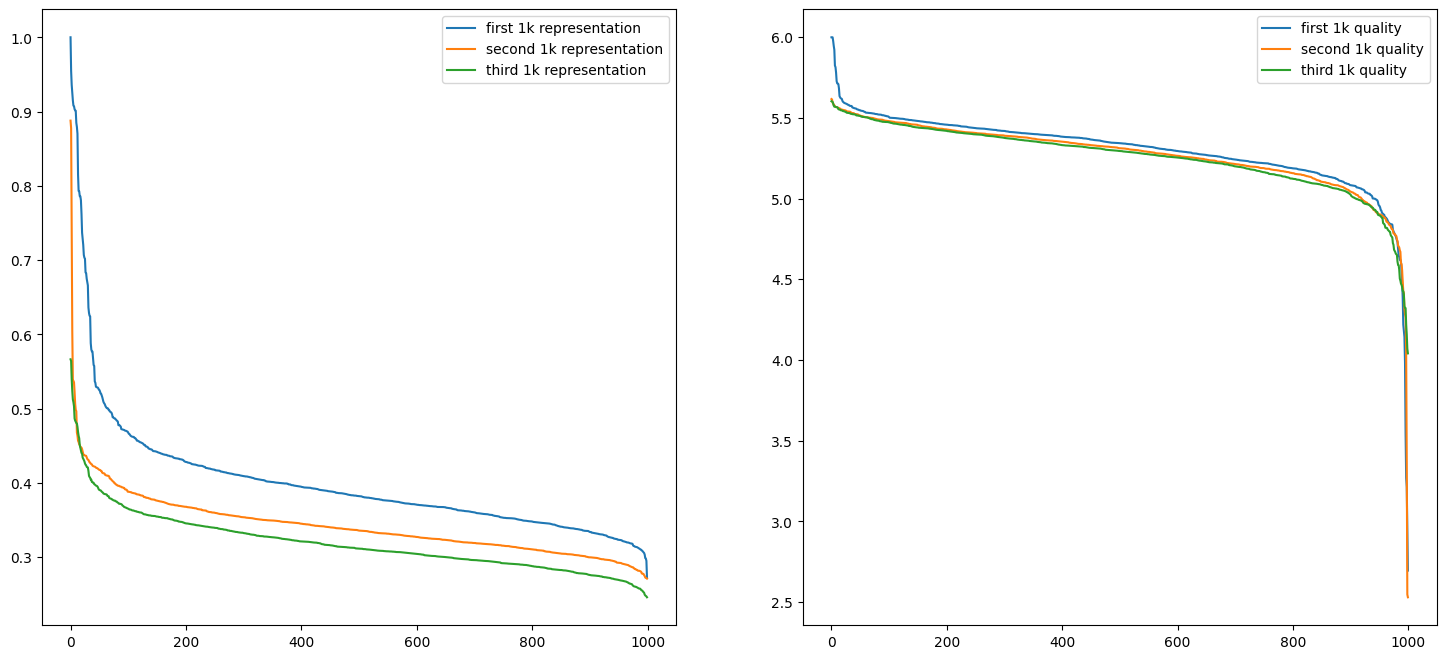

In [34]:
paths = (
    "../pool_evolve/ap_outputs/1213_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_1_3k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1213_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_2_3k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1213_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_1_3k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1213_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_2_3k/WizardLM_alpaca.pth",
)

path = paths[2]
data = torch.load(path)

representation_scores = data['representative_scores']
quality_scores = data['quality_scores']
overall_scores = data['overall_scores']
sorted_indices = overall_scores.sort(descending=True).indices 

print(spearmanr(overall_scores[sorted_indices][:1000], representation_scores[sorted_indices][:1000]))
print(spearmanr(overall_scores[sorted_indices][:1000], quality_scores[sorted_indices][:1000]))
print(representation_scores[sorted_indices][:1000].mean())
print(quality_scores[sorted_indices][:1000].mean())
print(representation_scores[sorted_indices][:1000].median())
print(quality_scores[sorted_indices][:1000].median())
print((quality_scores[sorted_indices][:1000]<5).sum())
print("**"*20)

print(spearmanr(overall_scores[sorted_indices][1000:2000], representation_scores[sorted_indices][1000:2000]))
print(spearmanr(overall_scores[sorted_indices][1000:2000], quality_scores[sorted_indices][1000:2000]))
print(representation_scores[sorted_indices][1000:2000].mean())
print(quality_scores[sorted_indices][1000:2000].mean())
print(representation_scores[sorted_indices][1000:2000].median())
print(quality_scores[sorted_indices][1000:2000].median())
print((quality_scores[sorted_indices][1000:2000]<5).sum())
print("**"*20)

print(spearmanr(overall_scores[sorted_indices][2000:3000], representation_scores[sorted_indices][2000:3000]))
print(spearmanr(overall_scores[sorted_indices][2000:3000], quality_scores[sorted_indices][2000:3000]))
print(representation_scores[sorted_indices][2000:3000].mean())
print(quality_scores[sorted_indices][2000:3000].mean())
print(representation_scores[sorted_indices][2000:3000].median())
print(quality_scores[sorted_indices][2000:3000].median())
print((quality_scores[sorted_indices][2000:3000]<5).sum())
print("**"*20)


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes[0].plot(representation_scores[sorted_indices][:1000].sort(descending=True).values, label="first 1k representation")
axes[0].plot(representation_scores[sorted_indices][1000:2000].sort(descending=True).values, label="second 1k representation")
axes[0].plot(representation_scores[sorted_indices][2000:3000].sort(descending=True).values, label="third 1k representation")
axes[0].legend()

axes[1].plot(quality_scores[sorted_indices][:1000].sort(descending=True).values, label="first 1k quality")
axes[1].plot(quality_scores[sorted_indices][1000:2000].sort(descending=True).values, label="second 1k quality")
axes[1].plot(quality_scores[sorted_indices][2000:3000].sort(descending=True).values, label="third 1k quality")
axes[1].legend()

plt.show()

In [ ]:
paths = (
    "../pool_evolve/ap_outputs/1213_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_1_3k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1213_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_2_3k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1213_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_1_3k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1213_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_2_3k/WizardLM_alpaca.pth",
)

path = paths[3]
data = torch.load(path)

representation_scores = data['representative_scores']
quality_scores = data['quality_scores']
overall_scores = data['overall_scores']
sorted_indices = overall_scores.sort(descending=True).indices 

print(spearmanr(overall_scores[sorted_indices][:1000], representation_scores[sorted_indices][:1000]))
print(spearmanr(overall_scores[sorted_indices][:1000], quality_scores[sorted_indices][:1000]))
print(representation_scores[sorted_indices][:1000].mean())
print(quality_scores[sorted_indices][:1000].mean())
print(representation_scores[sorted_indices][:1000].median())
print(quality_scores[sorted_indices][:1000].median())
print("**"*20)

print(spearmanr(overall_scores[sorted_indices][1000:2000], representation_scores[sorted_indices][1000:2000]))
print(spearmanr(overall_scores[sorted_indices][1000:2000], quality_scores[sorted_indices][1000:2000]))
print(representation_scores[sorted_indices][1000:2000].mean())
print(quality_scores[sorted_indices][1000:2000].mean())
print(representation_scores[sorted_indices][1000:2000].median())
print(quality_scores[sorted_indices][1000:2000].median())
print("**"*20)

print(spearmanr(overall_scores[sorted_indices][2000:3000], representation_scores[sorted_indices][2000:3000]))
print(spearmanr(overall_scores[sorted_indices][2000:3000], quality_scores[sorted_indices][2000:3000]))
print(representation_scores[sorted_indices][2000:3000].mean())
print(quality_scores[sorted_indices][2000:3000].mean())
print(representation_scores[sorted_indices][2000:3000].median())
print(quality_scores[sorted_indices][2000:3000].median())
print("**"*20)


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes[0].plot(representation_scores[sorted_indices][:1000].sort(descending=True).values, label="first 1k representation")
axes[0].plot(representation_scores[sorted_indices][1000:2000].sort(descending=True).values, label="second 1k representation")
axes[0].plot(representation_scores[sorted_indices][2000:3000].sort(descending=True).values, label="third 1k representation")
axes[0].legend()

axes[1].plot(quality_scores[sorted_indices][:1000].sort(descending=True).values, label="first 1k quality")
axes[1].plot(quality_scores[sorted_indices][1000:2000].sort(descending=True).values, label="second 1k quality")
axes[1].plot(quality_scores[sorted_indices][2000:3000].sort(descending=True).values, label="third 1k quality")
axes[1].legend()

plt.show()

SignificanceResult(statistic=0.4622749622749623, pvalue=4.313641371624547e-54)
SignificanceResult(statistic=0.2132804132804133, pvalue=9.449949039304855e-12)
tensor(0.3786)
tensor(5.4535, dtype=torch.float64)
tensor(0.3650)
tensor(5.4593, dtype=torch.float64)
****************************************
SignificanceResult(statistic=0.14942665742665742, pvalue=2.0743210643754973e-06)
SignificanceResult(statistic=0.08281925881925882, pvalue=0.00878777674318274)
tensor(0.3293)
tensor(5.4109, dtype=torch.float64)
tensor(0.3265)
tensor(5.4160, dtype=torch.float64)
****************************************
SignificanceResult(statistic=0.09762970962970964, pvalue=0.0019958613116320373)
SignificanceResult(statistic=0.09817339417339419, pvalue=0.0018826675350285614)
tensor(0.3116)
tensor(5.3807, dtype=torch.float64)
tensor(0.3076)
tensor(5.3881, dtype=torch.float64)
****************************************


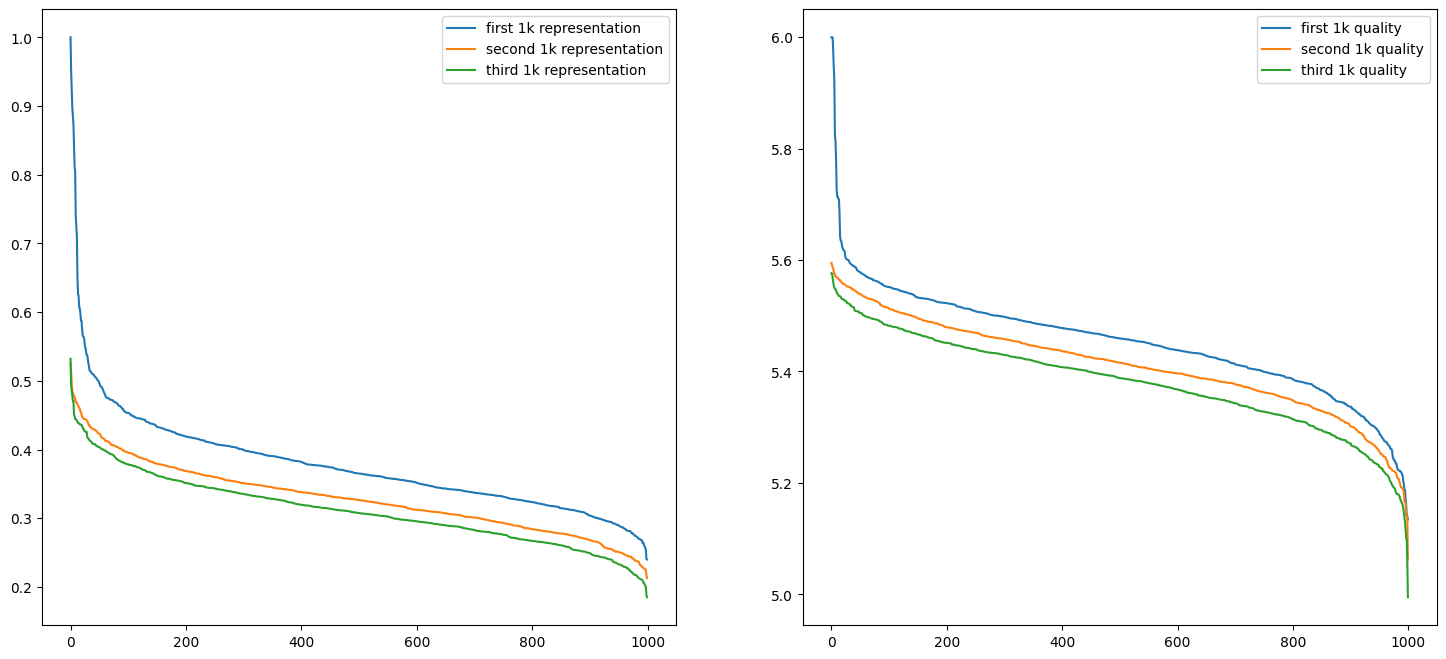

In [35]:
paths = (
    "../pool_evolve/ap_outputs/1213_mean_quality_ratio_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_1_3k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1213_mean_quality_ratio_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_2_3k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1213_mean_quality_ratio_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_1_3k/WizardLM_alpaca.pth",
    "../pool_evolve/ap_outputs/1213_mean_quality_ratio_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_2_3k/WizardLM_alpaca.pth",
)

path = paths[2]
data = torch.load(path)

representation_scores = data['representative_scores']
quality_scores = data['quality_scores']
overall_scores = data['overall_scores']
sorted_indices = overall_scores.sort(descending=True).indices 

print(spearmanr(overall_scores[sorted_indices][:1000], representation_scores[sorted_indices][:1000]))
print(spearmanr(overall_scores[sorted_indices][:1000], quality_scores[sorted_indices][:1000]))
print(representation_scores[sorted_indices][:1000].mean())
print(quality_scores[sorted_indices][:1000].mean())
print(representation_scores[sorted_indices][:1000].median())
print(quality_scores[sorted_indices][:1000].median())
print("**"*20)

print(spearmanr(overall_scores[sorted_indices][1000:2000], representation_scores[sorted_indices][1000:2000]))
print(spearmanr(overall_scores[sorted_indices][1000:2000], quality_scores[sorted_indices][1000:2000]))
print(representation_scores[sorted_indices][1000:2000].mean())
print(quality_scores[sorted_indices][1000:2000].mean())
print(representation_scores[sorted_indices][1000:2000].median())
print(quality_scores[sorted_indices][1000:2000].median())
print("**"*20)

print(spearmanr(overall_scores[sorted_indices][2000:3000], representation_scores[sorted_indices][2000:3000]))
print(spearmanr(overall_scores[sorted_indices][2000:3000], quality_scores[sorted_indices][2000:3000]))
print(representation_scores[sorted_indices][2000:3000].mean())
print(quality_scores[sorted_indices][2000:3000].mean())
print(representation_scores[sorted_indices][2000:3000].median())
print(quality_scores[sorted_indices][2000:3000].median())
print("**"*20)


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes[0].plot(representation_scores[sorted_indices][:1000].sort(descending=True).values, label="first 1k representation")
axes[0].plot(representation_scores[sorted_indices][1000:2000].sort(descending=True).values, label="second 1k representation")
axes[0].plot(representation_scores[sorted_indices][2000:3000].sort(descending=True).values, label="third 1k representation")
axes[0].legend()

axes[1].plot(quality_scores[sorted_indices][:1000].sort(descending=True).values, label="first 1k quality")
axes[1].plot(quality_scores[sorted_indices][1000:2000].sort(descending=True).values, label="second 1k quality")
axes[1].plot(quality_scores[sorted_indices][2000:3000].sort(descending=True).values, label="third 1k quality")
axes[1].legend()

plt.show()

# 上面的block为临时使用

In [1]:
import os
os.environ["TQDM_DISABLE"] = "True"

import random
import time
import json
import copy
from tqdm import tqdm

import torch
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import torch.nn.functional as F
import matplotlib.colors as mcolors
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
def jload(path):
    with open(path, 'r') as f:
        data = json.load(f)

    conv_str_bank = []
    for conversation in data:
        conversation = conversation['conversations']
        conv_str = ""
        for turn in conversation:
            conv_str += turn['value'] + '\n'
        conv_str = conv_str.strip()
        conv_str_bank.append(conv_str)
    return conv_str_bank


def pthload(path):
    data = torch.load(path)['data']
    conv_str_bank = []
    for conversation in data:
        conversation = conversation['conversations']
        conv_str = ""
        for turn in conversation:
            conv_str += turn['value'] + '\n'
        conv_str = conv_str.strip()
        conv_str_bank.append(conv_str)
    return conv_str_bank


def euclidean_distance(x, y):
    return torch.sqrt(torch.sum((x - y) ** 2, dim=-1))


def similarity(embeddings):
    n_samples = embeddings.shape[0]
    mask = torch.ones((n_samples, n_samples), dtype=bool)
    mask.fill_diagonal_(0)
    if torch.cuda.is_available():
        embeddings = embeddings.cuda().to(torch.float16)
        similarity = []
        batch_size = 10
        for i in tqdm(range(0, embeddings.size(0), batch_size)):
            end_i = min(i + batch_size, n_samples)
            similarity.append(F.cosine_similarity(embeddings[i:end_i].unsqueeze(1), embeddings.unsqueeze(0), dim=-1).masked_select(mask[i:end_i].cuda()).reshape(-1, n_samples-1).mean(dim=1))
        similarity = torch.cat(similarity)
    else:
        similarity = torch.tensor(cosine_similarity(embeddings)).masked_select(mask).v.reshape(-1, n_samples-1).mean(dim=1)
    avg_sim = similarity.mean()
    del similarity

    if torch.cuda.is_available():
        distance = []
        batch_size = 10
        for i in tqdm(range(0, embeddings.size(0), batch_size)):
            end_i = min(i + batch_size, n_samples)
            distance.append(euclidean_distance(embeddings[i:end_i].unsqueeze(1), embeddings.unsqueeze(0)).masked_select(mask[i:end_i].cuda()).reshape(-1, n_samples-1).mean(dim=1))
        distance = torch.cat(distance)
    else:
        distance = torch.tensor(euclidean_distances(embeddings)).masked_select(mask).v.reshape(-1, n_samples-1).mean(dim=1)
    avg_distance = distance.mean()
    del distance
    
    print("**"*20)
    print(
        f"Cos Sim: {avg_sim}, EU Distance: {avg_distance}"
    )

# 不同超参数选出的subset覆盖率

- 当gamma=2.0，quality的贡献被突出，选出的subset之间覆盖率显著高于gamma=1.0时  
- 通用现象
    1. 当lambda=0.90 (衰减较快)，alpha=0.3、0.5、0.8选出的数据均有较高相似度  
    2. 当lambda=0.95 (衰减较慢)，alpha=0.3、0.5、0.8选出的数据均有较高相似度  
    3. 当lambda=0.93，则对数据选择结果对alpha的值比较敏感  

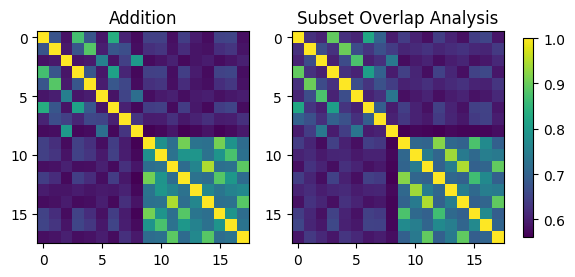

In [3]:
addition_names = (
    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.93_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.95_gamma_1.0_6k",

    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.9_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.93_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.95_gamma_1.0_6k",

    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.9_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.93_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.95_gamma_1.0_6k",

    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.93_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.95_gamma_2.0_6k",

    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.9_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.93_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.95_gamma_2.0_6k",

    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.9_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.93_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.95_gamma_2.0_6k",
)

multiplication_names = (
    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.93_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.95_gamma_1.0_6k",

    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.9_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.93_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.95_gamma_1.0_6k",

    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.9_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.93_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.95_gamma_1.0_6k",

    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.93_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.95_gamma_2.0_6k",

    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.9_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.93_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.95_gamma_2.0_6k",

    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.9_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.93_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.95_gamma_2.0_6k",
)

fig, axes = plt.subplots(1, 2)

overlap_cnt = []
for name in addition_names:
    path_a = f"../pool_evolve/ap_outputs/{name}/WizardLM_alpaca.pth"
    src_a_convs = pthload(path_a)
    src_a_convs = set(src_a_convs)
    tmp_cnt = []
    for sub_name in addition_names:
        cnt = 0
        path_b = f"../pool_evolve/ap_outputs/{sub_name}/WizardLM_alpaca.pth"
        src_b_convs = pthload(path_b)
        for conv in src_b_convs:
            cnt += 1 if conv in src_a_convs else 0
        tmp_cnt.append(cnt/6000)
    overlap_cnt.append(tmp_cnt)
overlap_cnt = np.array(overlap_cnt)
im1 = axes[0].imshow(overlap_cnt)
axes[0].set_title("Addition")

overlap_cnt = []
for name in multiplication_names:
    path_a = f"../pool_evolve/ap_outputs/{name}/WizardLM_alpaca.pth"
    src_a_convs = pthload(path_a)
    src_a_convs = set(src_a_convs)
    tmp_cnt = []
    for sub_name in multiplication_names:
        cnt = 0
        path_b = f"../pool_evolve/ap_outputs/{sub_name}/WizardLM_alpaca.pth"
        src_b_convs = pthload(path_b)
        for conv in src_b_convs:
            cnt += 1 if conv in src_a_convs else 0
        tmp_cnt.append(cnt/6000)
    overlap_cnt.append(tmp_cnt)
overlap_cnt = np.array(overlap_cnt)
im2 = axes[1].imshow(overlap_cnt)
axes[1].set_title("Multiplication")

cbar = fig.colorbar(im1, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
plt.title("Subset Overlap Analysis")
plt.savefig("../pool_evolve/subset_overlap.png", format='png')
plt.show()

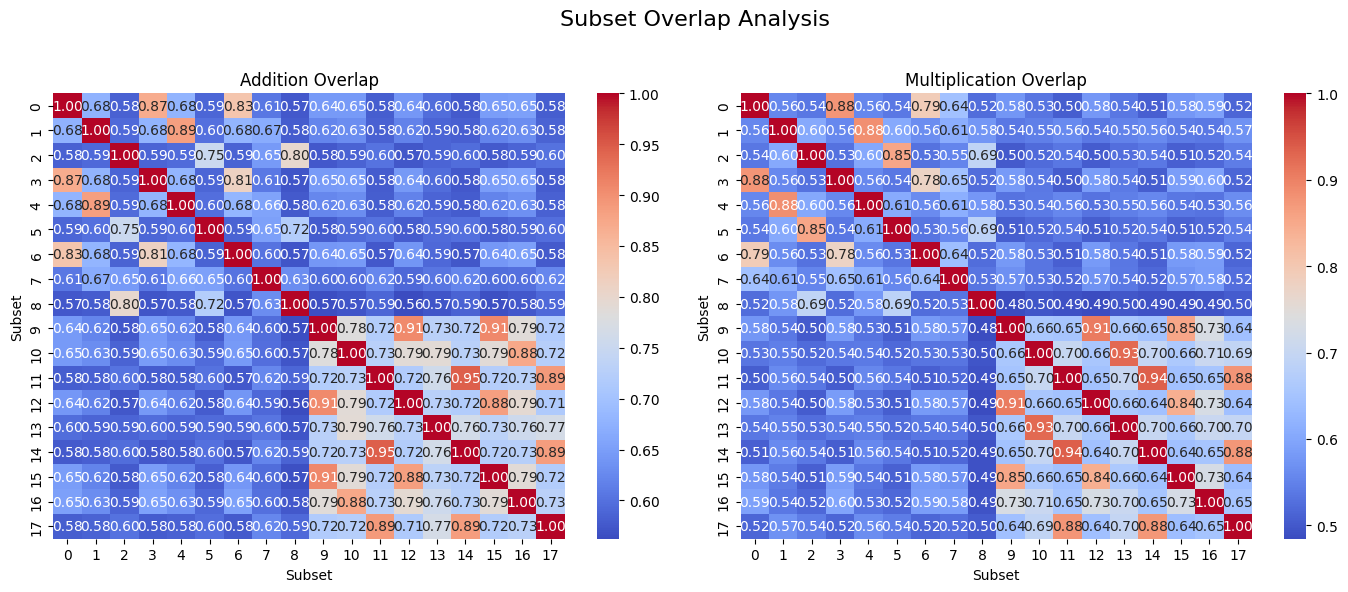

In [3]:
addition_names = (
    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.93_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.95_gamma_1.0_6k",

    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.9_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.93_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.95_gamma_1.0_6k",

    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.9_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.93_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.95_gamma_1.0_6k",

    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.93_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.95_gamma_2.0_6k",

    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.9_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.93_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.95_gamma_2.0_6k",

    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.9_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.93_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.95_gamma_2.0_6k",
)

multiplication_names = (
    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.93_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.95_gamma_1.0_6k",

    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.9_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.93_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.95_gamma_1.0_6k",

    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.9_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.93_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.95_gamma_1.0_6k",

    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.93_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.95_gamma_2.0_6k",

    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.9_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.93_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.95_gamma_2.0_6k",

    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.9_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.93_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.95_gamma_2.0_6k",
)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Addition Overlap
overlap_cnt = []
for name in addition_names:
    path_a = f"../pool_evolve/ap_outputs/{name}/WizardLM_alpaca.pth"
    src_a_convs = pthload(path_a)
    src_a_convs = set(src_a_convs)
    tmp_cnt = []
    for sub_name in addition_names:
        cnt = 0
        path_b = f"../pool_evolve/ap_outputs/{sub_name}/WizardLM_alpaca.pth"
        src_b_convs = pthload(path_b)
        for conv in src_b_convs:
            cnt += 1 if conv in src_a_convs else 0
        tmp_cnt.append(cnt / 6000)
    overlap_cnt.append(tmp_cnt)
overlap_cnt = np.array(overlap_cnt)
sns.heatmap(overlap_cnt, ax=axes[0], cmap="coolwarm", annot=False)
axes[0].set_title("Addition Overlap")
# axes[0].set_xlabel("Subset")
# axes[0].set_ylabel("Subset")

# Multiplication Overlap
overlap_cnt = []
for name in multiplication_names:
    path_a = f"../pool_evolve/ap_outputs/{name}/WizardLM_alpaca.pth"
    src_a_convs = pthload(path_a)
    src_a_convs = set(src_a_convs)
    tmp_cnt = []
    for sub_name in multiplication_names:
        cnt = 0
        path_b = f"../pool_evolve/ap_outputs/{sub_name}/WizardLM_alpaca.pth"
        src_b_convs = pthload(path_b)
        for conv in src_b_convs:
            cnt += 1 if conv in src_a_convs else 0
        tmp_cnt.append(cnt / 6000)
    overlap_cnt.append(tmp_cnt)
overlap_cnt = np.array(overlap_cnt)
sns.heatmap(overlap_cnt, ax=axes[1], cmap="coolwarm", annot=False)
axes[1].set_title("Multiplication Overlap")
# axes[1].set_xlabel("Subset")
# axes[1].set_ylabel("Subset")

plt.suptitle("Subset Overlap Analysis", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("../pool_evolve/subset_overlap.pdf", format="pdf")
plt.show()

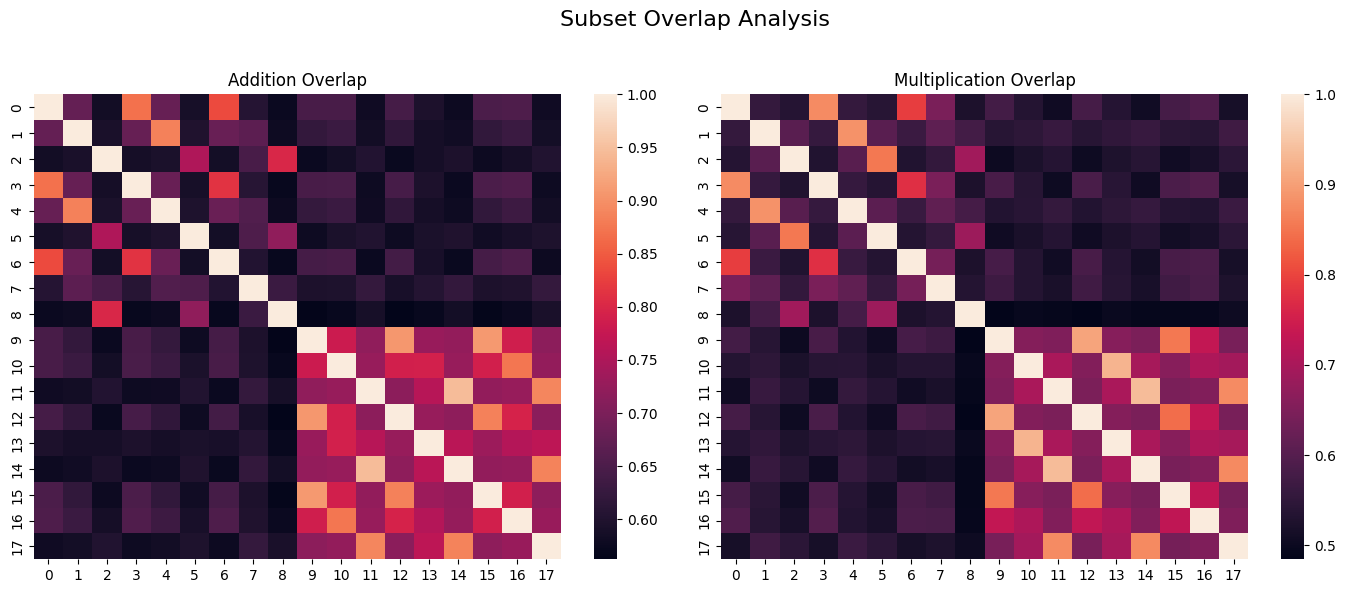

In [8]:
addition_names = (
    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.93_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.95_gamma_1.0_6k",

    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.9_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.93_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.95_gamma_1.0_6k",

    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.9_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.93_gamma_1.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.95_gamma_1.0_6k",

    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.9_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.93_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.3_lambda_0.95_gamma_2.0_6k",

    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.9_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.93_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.5_lambda_0.95_gamma_2.0_6k",

    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.9_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.93_gamma_2.0_6k",
    "1209_cleaned_euclidean_addition_alpha_0.8_lambda_0.95_gamma_2.0_6k",
)

multiplication_names = (
    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.93_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.95_gamma_1.0_6k",

    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.9_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.93_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.95_gamma_1.0_6k",

    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.9_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.93_gamma_1.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.95_gamma_1.0_6k",

    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.9_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.93_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.3_lambda_0.95_gamma_2.0_6k",

    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.9_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.93_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.5_lambda_0.95_gamma_2.0_6k",

    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.9_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.93_gamma_2.0_6k",
    "1205_cleaned_euclidean_multiply_alpha_0.8_lambda_0.95_gamma_2.0_6k",
)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Addition Overlap
overlap_cnt = []
for name in addition_names:
    path_a = f"../pool_evolve/ap_outputs/{name}/WizardLM_alpaca.pth"
    src_a_convs = pthload(path_a)
    src_a_convs = set(src_a_convs)
    tmp_cnt = []
    for sub_name in addition_names:
        cnt = 0
        path_b = f"../pool_evolve/ap_outputs/{sub_name}/WizardLM_alpaca.pth"
        src_b_convs = pthload(path_b)
        for conv in src_b_convs:
            cnt += 1 if conv in src_a_convs else 0
        tmp_cnt.append(cnt / 6000)
    overlap_cnt.append(tmp_cnt)
overlap_cnt = np.array(overlap_cnt)
sns.heatmap(overlap_cnt, ax=axes[0], cmap="rocket", annot=False)
axes[0].set_title("Addition Overlap")
# axes[0].set_xlabel("Subset")
# axes[0].set_ylabel("Subset")

# Multiplication Overlap
overlap_cnt = []
for name in multiplication_names:
    path_a = f"../pool_evolve/ap_outputs/{name}/WizardLM_alpaca.pth"
    src_a_convs = pthload(path_a)
    src_a_convs = set(src_a_convs)
    tmp_cnt = []
    for sub_name in multiplication_names:
        cnt = 0
        path_b = f"../pool_evolve/ap_outputs/{sub_name}/WizardLM_alpaca.pth"
        src_b_convs = pthload(path_b)
        for conv in src_b_convs:
            cnt += 1 if conv in src_a_convs else 0
        tmp_cnt.append(cnt / 6000)
    overlap_cnt.append(tmp_cnt)
overlap_cnt = np.array(overlap_cnt)
sns.heatmap(overlap_cnt, ax=axes[1], cmap="rocket", annot=False)
axes[1].set_title("Multiplication Overlap")
# axes[1].set_xlabel("Subset")
# axes[1].set_ylabel("Subset")

plt.suptitle("Subset Overlap Analysis", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("../pool_evolve/subset_overlap.pdf", format="pdf")
plt.show()

# 每个候选指令集的前置分析

In [4]:
datasets =[
    {'name': 'Self_instruct', 'path': '../data/cleaned_self_instruction_instruction_embedding.pth'},
    {'name': 'Alpaca_gpt4', 'path': '../data/cleaned_alpaca_gpt4_data_instruction_embedding.pth'},
    {'name': 'Dolly', 'path': '../data/cleaned_databricks_dolly_15k_instruction_embedding.pth'},
    {'name': 'ShareGPT', 'path': '../data/cleaned_ShareGPT_V3_unfiltered_cleaned_split_no_imsorry_instruction_embedding.pth'},
    {'name': 'WizardLM_alpaca', 'path': '../data/cleaned_alpaca_evol_instruct_70k_instruction_embedding.pth'},
]

for record in datasets:
    print(f"Current Instruction Set: {record['name']}")
    data = torch.load(record['path'])
    embedidng = torch.cat([item['embedding'].unsqueeze(0) for item in data])
    with torch.no_grad():
        torch.cuda.empty_cache()
        similarity(embedidng)
    print("--"*40)

Current Instruction Set: Self_instruct


KeyboardInterrupt: 

# representation有效性验证

根据每个AP mini step得到的representation score，从低、中、高三段各选出6k条数据，比较它们的多样性。

只考虑了数据量为33,000的mini step，总体而言呈现出diversity: top 6k > mid 6k > bottom 6k的趋势（除了在sharegpt的前两个mini step上 mid 6k 和 bottom 6k 异常）；此外，最近邻居距离总是：top 6k > mid 6k > bottom。

在alpha=(0.3, 0.5)、lambda=(0.90, 0.93, 0.95)的结果上均显示出以上趋势 --> 表明结果可泛化。

P.s. ShareGPT是多轮对话，conv embedding 是每一轮 instruction embedding 的平均 --> 这是否导致了sharegpt embedding的分布和单轮对话数据有差异？

In [3]:
datasets =[
    {'name': 'Self_instruct', 'path': '../data/cleaned_self_instruction_instruction_embedding.pth'},
    {'name': 'Alpaca_gpt4', 'path': '../data/cleaned_alpaca_gpt4_data_instruction_embedding.pth'},
    {'name': 'Dolly', 'path': '../data/cleaned_databricks_dolly_15k_instruction_embedding.pth'},
    {'name': 'ShareGPT', 'path': '../data/cleaned_ShareGPT_V3_unfiltered_cleaned_split_no_imsorry_instruction_embedding.pth'},
    {'name': 'WizardLM_alpaca', 'path': '../data/cleaned_alpaca_evol_instruct_70k_instruction_embedding.pth'},
]

name = "1205_cleaned_euclidean_multiply_alpha_0.5_lamb_0.9_gamma_1.0"
pool_indexes = []
full_data = []
batch_size = 27000
pool_size = 6000
last_count=0
cnt=0

for item in datasets:
    data = torch.load(item['path'])
    full_data += data
    cur_left = 0
    while cur_left < len(data):
        log = torch.load(f"../pool_evolve/ap_logs/{name}/{cnt}.pth")
        scaled_representation_scores = torch.tensor(log['scaled_representation_scores'])
        sort_indices_ = scaled_representation_scores.sort(descending=True).indices
        top_6k_pool_indexes = sort_indices_[:6000]
        tmp_pool_indexes = []

        if cnt == 0:
            pool_indexes = copy.deepcopy(top_6k_pool_indexes)
        else:
            for idx in top_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            pool_indexes = copy.deepcopy(tmp_pool_indexes)

        if scaled_representation_scores.shape[0] == 33000:
            # 计算 representation score top 6k 数据的多样性（平均余弦相似度/欧氏距离）
            top_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(top_6k_embeddings)

            # 计算 representation score mid 6k 数据的多样性（平均余弦相似度/欧氏距离）
            mid_6k_pool_indexes = sort_indices_[13500:19500]
            tmp_pool_indexes = []
            for idx in mid_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            mid_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(mid_6k_embeddings)

            # 计算 representation score bottom 6k 数据的多样性（平均余弦相似度/欧氏距离）
            bottom_6k_pool_indexes = sort_indices_[-6000:]
            tmp_pool_indexes = []
            for idx in bottom_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            bottom_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(bottom_6k_embeddings)

            print("--"*40)

        cur_right = min(cur_left+batch_size, len(data))
        last_count += cur_right - cur_left
        cur_left = cur_right
        cnt += 1

****************************************
Cos Sim: 0.6923828125, EU Distance: 95.3125
****************************************
Cos Sim: 0.7412109375, EU Distance: 87.8125
****************************************
Cos Sim: 0.75927734375, EU Distance: 84.5
--------------------------------------------------------------------------------
****************************************
Cos Sim: 0.6943359375, EU Distance: 95.0625
****************************************
Cos Sim: 0.7392578125, EU Distance: 88.125
****************************************
Cos Sim: 0.759765625, EU Distance: 84.4375
--------------------------------------------------------------------------------
****************************************
Cos Sim: 0.7041015625, EU Distance: 93.75
****************************************
Cos Sim: 0.7822265625, EU Distance: 80.6875
****************************************
Cos Sim: 0.82275390625, EU Distance: 73.125
-------------------------------------------------------------------------------

In [4]:
name = "1205_cleaned_euclidean_multiply_alpha_0.5_lamb_0.93_gamma_1.0"
pool_indexes = []
full_data = []
batch_size = 27000
pool_size = 6000
last_count=0
cnt=0

for item in datasets:
    data = torch.load(item['path'])
    full_data += data
    cur_left = 0
    while cur_left < len(data):
        log = torch.load(f"../pool_evolve/ap_logs/{name}/{cnt}.pth")
        scaled_representation_scores = torch.tensor(log['scaled_representation_scores'])
        sort_indices_ = scaled_representation_scores.sort(descending=True).indices
        top_6k_pool_indexes = sort_indices_[:6000]
        tmp_pool_indexes = []

        if cnt == 0:
            pool_indexes = copy.deepcopy(top_6k_pool_indexes)
        else:
            for idx in top_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            pool_indexes = copy.deepcopy(tmp_pool_indexes)
        
        if scaled_representation_scores.shape[0] == 33000:
            # 计算 representation score top 6k 数据的多样性（平均余弦相似度/欧氏距离）
            top_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(top_6k_embeddings)
    
            # 计算 representation score mid 6k 数据的多样性（平均余弦相似度/欧氏距离）
            mid_6k_pool_indexes = sort_indices_[13500:19500]
            tmp_pool_indexes = []
            for idx in mid_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            mid_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(mid_6k_embeddings)
    
            # 计算 representation score bottom 6k 数据的多样性（平均余弦相似度/欧氏距离）
            bottom_6k_pool_indexes = sort_indices_[-6000:]
            tmp_pool_indexes = []
            for idx in bottom_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            bottom_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(bottom_6k_embeddings)
        
            print("--"*40)
            
        cur_right = min(cur_left+batch_size, len(data))
        last_count += cur_right - cur_left
        cur_left = cur_right
        cnt += 1

****************************************
Cos Sim: 0.69287109375, EU Distance: 95.25
****************************************
Cos Sim: 0.74072265625, EU Distance: 87.9375
****************************************
Cos Sim: 0.7587890625, EU Distance: 84.5625
--------------------------------------------------------------------------------
****************************************
Cos Sim: 0.6943359375, EU Distance: 95.0625
****************************************
Cos Sim: 0.73876953125, EU Distance: 88.25
****************************************
Cos Sim: 0.7607421875, EU Distance: 84.3125
--------------------------------------------------------------------------------
****************************************
Cos Sim: 0.7021484375, EU Distance: 94.0625
****************************************
Cos Sim: 0.78125, EU Distance: 80.9375
****************************************
Cos Sim: 0.8232421875, EU Distance: 73.0625
-------------------------------------------------------------------------------

In [5]:
name = "1205_cleaned_euclidean_multiply_alpha_0.5_lamb_0.95_gamma_1.0"
pool_indexes = []
full_data = []
batch_size = 27000
pool_size = 6000
last_count=0
cnt=0

for item in datasets:
    data = torch.load(item['path'])
    full_data += data
    cur_left = 0
    while cur_left < len(data):
        log = torch.load(f"../pool_evolve/ap_logs/{name}/{cnt}.pth")
        scaled_representation_scores = torch.tensor(log['scaled_representation_scores'])
        sort_indices_ = scaled_representation_scores.sort(descending=True).indices
        top_6k_pool_indexes = sort_indices_[:6000]
        tmp_pool_indexes = []

        if cnt == 0:
            pool_indexes = copy.deepcopy(top_6k_pool_indexes)
        else:
            for idx in top_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            pool_indexes = copy.deepcopy(tmp_pool_indexes)
        
        if scaled_representation_scores.shape[0] == 33000:
            # 计算 representation score top 6k 数据的多样性（平均余弦相似度/欧氏距离）
            top_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(top_6k_embeddings)
    
            # 计算 representation score mid 6k 数据的多样性（平均余弦相似度/欧氏距离）
            mid_6k_pool_indexes = sort_indices_[13500:19500]
            tmp_pool_indexes = []
            for idx in mid_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            mid_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(mid_6k_embeddings)
    
            # 计算 representation score bottom 6k 数据的多样性（平均余弦相似度/欧氏距离）
            bottom_6k_pool_indexes = sort_indices_[-6000:]
            tmp_pool_indexes = []
            for idx in bottom_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            bottom_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(bottom_6k_embeddings)
        
            print("--"*40)
            
        cur_right = min(cur_left+batch_size, len(data))
        last_count += cur_right - cur_left
        cur_left = cur_right
        cnt += 1

****************************************
Cos Sim: 0.6923828125, EU Distance: 95.375
****************************************
Cos Sim: 0.74072265625, EU Distance: 87.875
****************************************
Cos Sim: 0.7568359375, EU Distance: 84.875
--------------------------------------------------------------------------------
****************************************
Cos Sim: 0.69384765625, EU Distance: 95.125
****************************************
Cos Sim: 0.7392578125, EU Distance: 88.125
****************************************
Cos Sim: 0.76025390625, EU Distance: 84.375
--------------------------------------------------------------------------------
****************************************
Cos Sim: 0.70166015625, EU Distance: 94.125
****************************************
Cos Sim: 0.7802734375, EU Distance: 81.125
****************************************
Cos Sim: 0.82373046875, EU Distance: 72.9375
----------------------------------------------------------------------------

In [6]:
name = "1205_cleaned_euclidean_multiply_alpha_0.3_lamb_0.9_gamma_1.0"
pool_indexes = []
full_data = []
batch_size = 27000
pool_size = 6000
last_count=0
cnt=0

for item in datasets:
    data = torch.load(item['path'])
    full_data += data
    cur_left = 0
    while cur_left < len(data):
        log = torch.load(f"../pool_evolve/ap_logs/{name}/{cnt}.pth")
        scaled_representation_scores = torch.tensor(log['scaled_representation_scores'])
        sort_indices_ = scaled_representation_scores.sort(descending=True).indices
        top_6k_pool_indexes = sort_indices_[:6000]
        tmp_pool_indexes = []

        if cnt == 0:
            pool_indexes = copy.deepcopy(top_6k_pool_indexes)
        else:
            for idx in top_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            pool_indexes = copy.deepcopy(tmp_pool_indexes)
        
        if scaled_representation_scores.shape[0] == 33000:
            # 计算 representation score top 6k 数据的多样性（平均余弦相似度/欧氏距离）
            top_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(top_6k_embeddings)
    
            # 计算 representation score mid 6k 数据的多样性（平均余弦相似度/欧氏距离）
            mid_6k_pool_indexes = sort_indices_[13500:19500]
            tmp_pool_indexes = []
            for idx in mid_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            mid_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(mid_6k_embeddings)
    
            # 计算 representation score bottom 6k 数据的多样性（平均余弦相似度/欧氏距离）
            bottom_6k_pool_indexes = sort_indices_[-6000:]
            tmp_pool_indexes = []
            for idx in bottom_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            bottom_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(bottom_6k_embeddings)
        
            print("--"*40)
            
        cur_right = min(cur_left+batch_size, len(data))
        last_count += cur_right - cur_left
        cur_left = cur_right
        cnt += 1

****************************************
Cos Sim: 0.69189453125, EU Distance: 95.4375
****************************************
Cos Sim: 0.7412109375, EU Distance: 87.875
****************************************
Cos Sim: 0.7587890625, EU Distance: 84.5625
--------------------------------------------------------------------------------
****************************************
Cos Sim: 0.69384765625, EU Distance: 95.1875
****************************************
Cos Sim: 0.73828125, EU Distance: 88.3125
****************************************
Cos Sim: 0.759765625, EU Distance: 84.4375
--------------------------------------------------------------------------------
****************************************
Cos Sim: 0.703125, EU Distance: 93.9375
****************************************
Cos Sim: 0.78076171875, EU Distance: 81.0
****************************************
Cos Sim: 0.822265625, EU Distance: 73.25
--------------------------------------------------------------------------------
***

In [7]:
name = "1205_cleaned_euclidean_multiply_alpha_0.3_lamb_0.93_gamma_1.0"
pool_indexes = []
full_data = []
batch_size = 27000
pool_size = 6000
last_count=0
cnt=0

for item in datasets:
    data = torch.load(item['path'])
    full_data += data
    cur_left = 0
    while cur_left < len(data):
        log = torch.load(f"../pool_evolve/ap_logs/{name}/{cnt}.pth")
        scaled_representation_scores = torch.tensor(log['scaled_representation_scores'])
        sort_indices_ = scaled_representation_scores.sort(descending=True).indices
        top_6k_pool_indexes = sort_indices_[:6000]
        tmp_pool_indexes = []

        if cnt == 0:
            pool_indexes = copy.deepcopy(top_6k_pool_indexes)
        else:
            for idx in top_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            pool_indexes = copy.deepcopy(tmp_pool_indexes)
        
        if scaled_representation_scores.shape[0] == 33000:
            # 计算 representation score top 6k 数据的多样性（平均余弦相似度/欧氏距离）
            top_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(top_6k_embeddings)
    
            # 计算 representation score mid 6k 数据的多样性（平均余弦相似度/欧氏距离）
            mid_6k_pool_indexes = sort_indices_[13500:19500]
            tmp_pool_indexes = []
            for idx in mid_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            mid_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(mid_6k_embeddings)
    
            # 计算 representation score bottom 6k 数据的多样性（平均余弦相似度/欧氏距离）
            bottom_6k_pool_indexes = sort_indices_[-6000:]
            tmp_pool_indexes = []
            for idx in bottom_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            bottom_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(bottom_6k_embeddings)
        
            print("--"*40)
            
        cur_right = min(cur_left+batch_size, len(data))
        last_count += cur_right - cur_left
        cur_left = cur_right
        cnt += 1

****************************************
Cos Sim: 0.69189453125, EU Distance: 95.375
****************************************
Cos Sim: 0.73974609375, EU Distance: 88.0625
****************************************
Cos Sim: 0.75830078125, EU Distance: 84.6875
--------------------------------------------------------------------------------
****************************************
Cos Sim: 0.693359375, EU Distance: 95.1875
****************************************
Cos Sim: 0.73876953125, EU Distance: 88.1875
****************************************
Cos Sim: 0.7607421875, EU Distance: 84.25
--------------------------------------------------------------------------------
****************************************
Cos Sim: 0.70361328125, EU Distance: 93.875
****************************************
Cos Sim: 0.78125, EU Distance: 80.9375
****************************************
Cos Sim: 0.8232421875, EU Distance: 73.0
--------------------------------------------------------------------------------


In [8]:
name = "1205_cleaned_euclidean_multiply_alpha_0.3_lamb_0.95_gamma_1.0"
pool_indexes = []
full_data = []
batch_size = 27000
pool_size = 6000
last_count=0
cnt=0

for item in datasets:
    data = torch.load(item['path'])
    full_data += data
    cur_left = 0
    while cur_left < len(data):
        log = torch.load(f"../pool_evolve/ap_logs/{name}/{cnt}.pth")
        scaled_representation_scores = torch.tensor(log['scaled_representation_scores'])
        sort_indices_ = scaled_representation_scores.sort(descending=True).indices
        top_6k_pool_indexes = sort_indices_[:6000]
        tmp_pool_indexes = []

        if cnt == 0:
            pool_indexes = copy.deepcopy(top_6k_pool_indexes)
        else:
            for idx in top_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            pool_indexes = copy.deepcopy(tmp_pool_indexes)
        
        if scaled_representation_scores.shape[0] == 33000:
            # 计算 representation score top 6k 数据的多样性（平均余弦相似度/欧氏距离）
            top_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(top_6k_embeddings)
    
            # 计算 representation score mid 6k 数据的多样性（平均余弦相似度/欧氏距离）
            mid_6k_pool_indexes = sort_indices_[13500:19500]
            tmp_pool_indexes = []
            for idx in mid_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            mid_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(mid_6k_embeddings)
    
            # 计算 representation score bottom 6k 数据的多样性（平均余弦相似度/欧氏距离）
            bottom_6k_pool_indexes = sort_indices_[-6000:]
            tmp_pool_indexes = []
            for idx in bottom_6k_pool_indexes:
                if idx < pool_size:
                    tmp_pool_indexes.append(pool_indexes[idx])
                else:
                    tmp_pool_indexes.append(last_count + idx - pool_size)
            bottom_6k_embeddings = torch.cat([full_data[idx]['embedding'].unsqueeze(0) for idx in tmp_pool_indexes], dim=0)
            similarity(bottom_6k_embeddings)
        
            print("--"*40)
            
        cur_right = min(cur_left+batch_size, len(data))
        last_count += cur_right - cur_left
        cur_left = cur_right
        cnt += 1

****************************************
Cos Sim: 0.69140625, EU Distance: 95.5
****************************************
Cos Sim: 0.74072265625, EU Distance: 87.875
****************************************
Cos Sim: 0.75537109375, EU Distance: 85.0625
--------------------------------------------------------------------------------
****************************************
Cos Sim: 0.6943359375, EU Distance: 95.125
****************************************
Cos Sim: 0.73779296875, EU Distance: 88.375
****************************************
Cos Sim: 0.76025390625, EU Distance: 84.3125
--------------------------------------------------------------------------------
****************************************
Cos Sim: 0.70068359375, EU Distance: 94.25
****************************************
Cos Sim: 0.78076171875, EU Distance: 81.0
****************************************
Cos Sim: 0.82373046875, EU Distance: 73.0
--------------------------------------------------------------------------------
*

# 不同 Lambda 衰减可视化

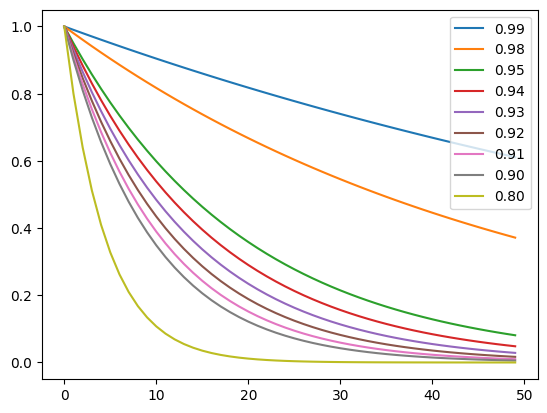

In [9]:
decay_099 = torch.tensor([0.99**i for i in range(50)])
decay_098 = torch.tensor([0.98**i for i in range(50)])
decay_095 = torch.tensor([0.95**i for i in range(50)])
decay_094 = torch.tensor([0.94**i for i in range(50)])
decay_093 = torch.tensor([0.93**i for i in range(50)])
decay_092 = torch.tensor([0.92**i for i in range(50)])
decay_091 = torch.tensor([0.91**i for i in range(50)])
decay_090 = torch.tensor([0.90**i for i in range(50)])
decay_080 = torch.tensor([0.80**i for i in range(50)])

x_values = range(50)
plt.plot(x_values, decay_099, label='0.99')
plt.plot(x_values, decay_098, label='0.98')
plt.plot(x_values, decay_095, label='0.95')
plt.plot(x_values, decay_094, label='0.94')
plt.plot(x_values, decay_093, label='0.93')
plt.plot(x_values, decay_092, label='0.92')
plt.plot(x_values, decay_091, label='0.91')
plt.plot(x_values, decay_090, label='0.90')
plt.plot(x_values, decay_080, label='0.80')
plt.legend()
plt.show()

# Representation Score & Overall Score 以及 Quality Score & Overall Score 可视化

除第一个mini step外，将前6k条数据 (i.e. data in InsBank) 的representation score最小值作为clip下界，避免因实际最小值和最大值差值远大于头部值之间的差值，导致min-max归一化后数据两极分化缺乏区分度。

经处理后，

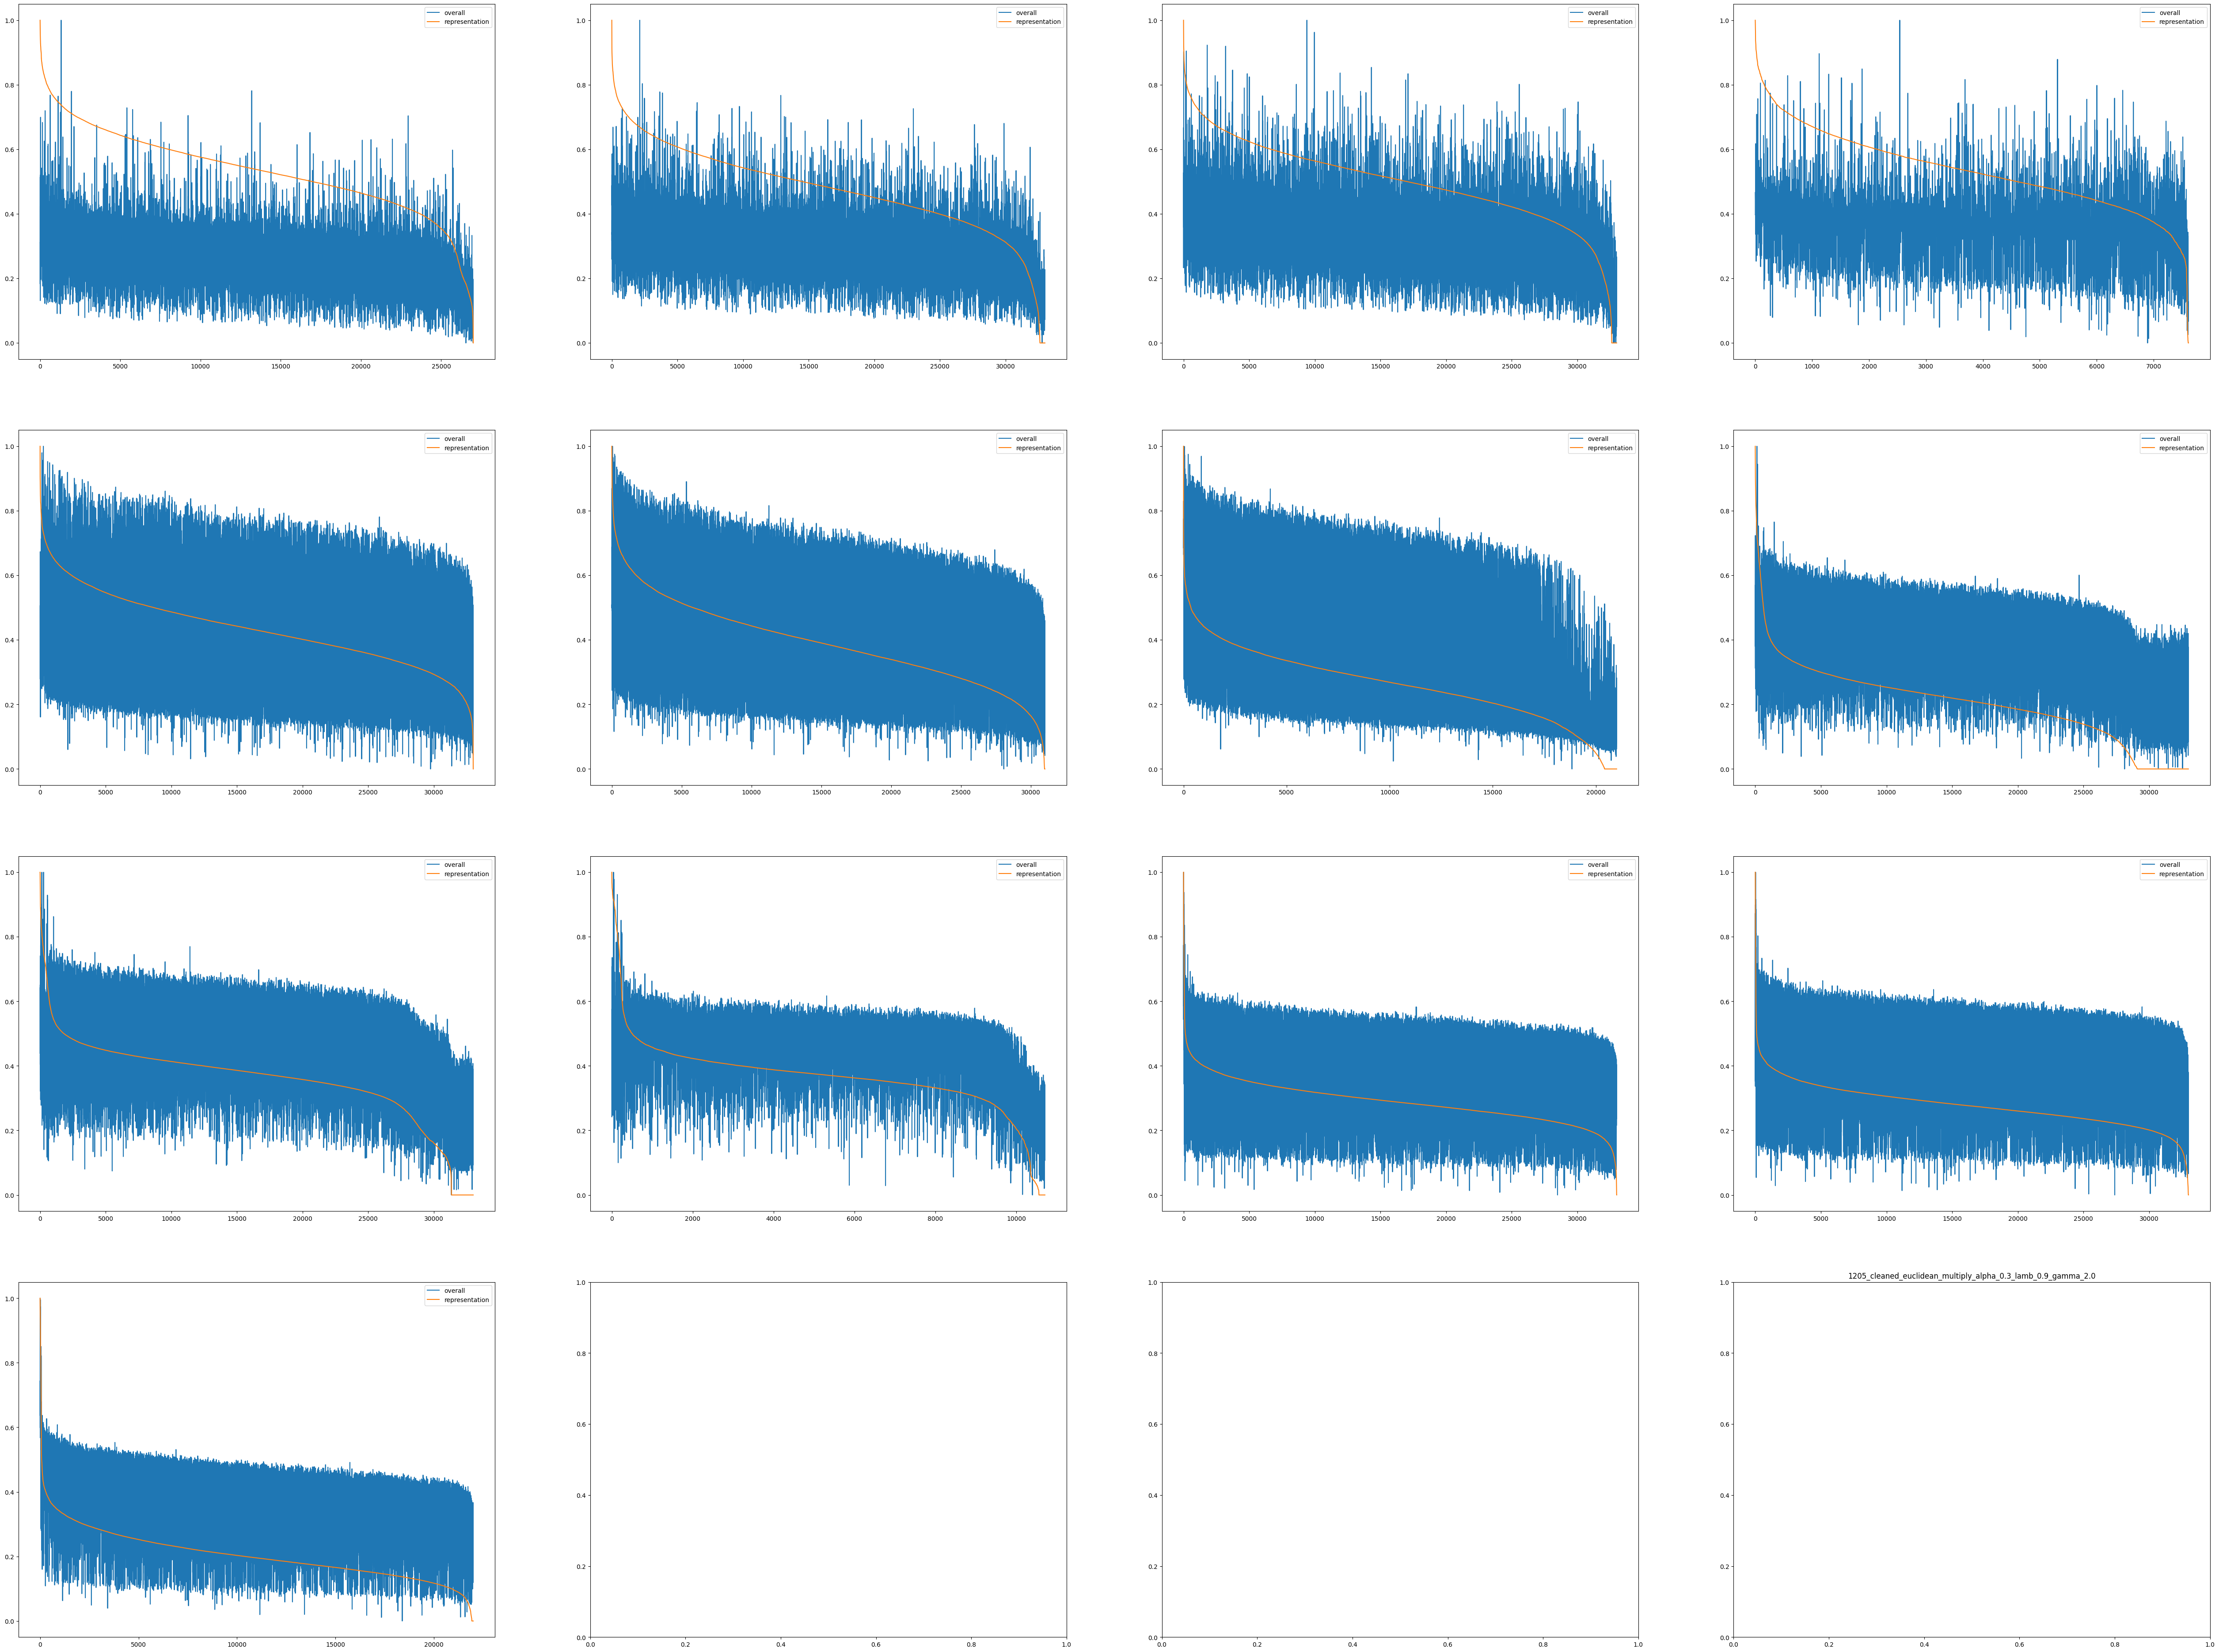

In [10]:
name = "1205_cleaned_euclidean_multiply_alpha_0.3_lamb_0.9_gamma_2.0"
fig, axes = plt.subplots(4, 4, figsize=(16*4, 12*4))
for i in range(13):
    gamma = float(name.split('gamma_')[-1])
    log = torch.load(f"../pool_evolve/ap_logs/{name}/{i}.pth")

    representation = torch.tensor(log['representation'])
    min_value = representation.min() if i == 0 else representation[:6000].min()
    max_value = representation.max()
    scaled_representation_scores = (representation - min_value) / (max_value - min_value)
    scaled_representation_scores[scaled_representation_scores<0]=0

    quality = torch.tensor(log['quality'])
    min_value = quality.min()
    max_value = quality.max()
    scaled_quality_scores = (quality - min_value) / (max_value - min_value)
    sorted_scaled_representation_scores = scaled_representation_scores.sort(descending=True).values
    sorted_scaled_representation_indices = scaled_representation_scores.sort(descending=True).indices

    overall_scores = (1+scaled_representation_scores) * (1+scaled_quality_scores).pow(gamma)
    min_value = overall_scores.min()
    max_value = overall_scores.max()
    scaled_overall_scores = (overall_scores - min_value) / (max_value - min_value)

    # print(spearmanr(overall_scores, representation))
    # print(spearmanr(overall_scores, quality))
    # print("--"*20)

    # print(spearmanr(overall_scores[:6000], representation[:6000]))
    # print(spearmanr(overall_scores[:6000], quality[:6000]))
    # print("--"*20)

    x_values = range(scaled_representation_scores.shape[0])
    # axes[i//4][i%4].plot(x_values, scaled_representation_scores)
    # axes[i//4][i%4].plot(x_values, scaled_quality_scores[sorted_scaled_representation_indices], label='quality')
    axes[i//4][i%4].plot(x_values, scaled_overall_scores[sorted_scaled_representation_indices], label='overall')
    axes[i//4][i%4].plot(x_values, sorted_scaled_representation_scores, label='representation')
    axes[i//4][i%4].legend()
plt.title(name)
plt.show()

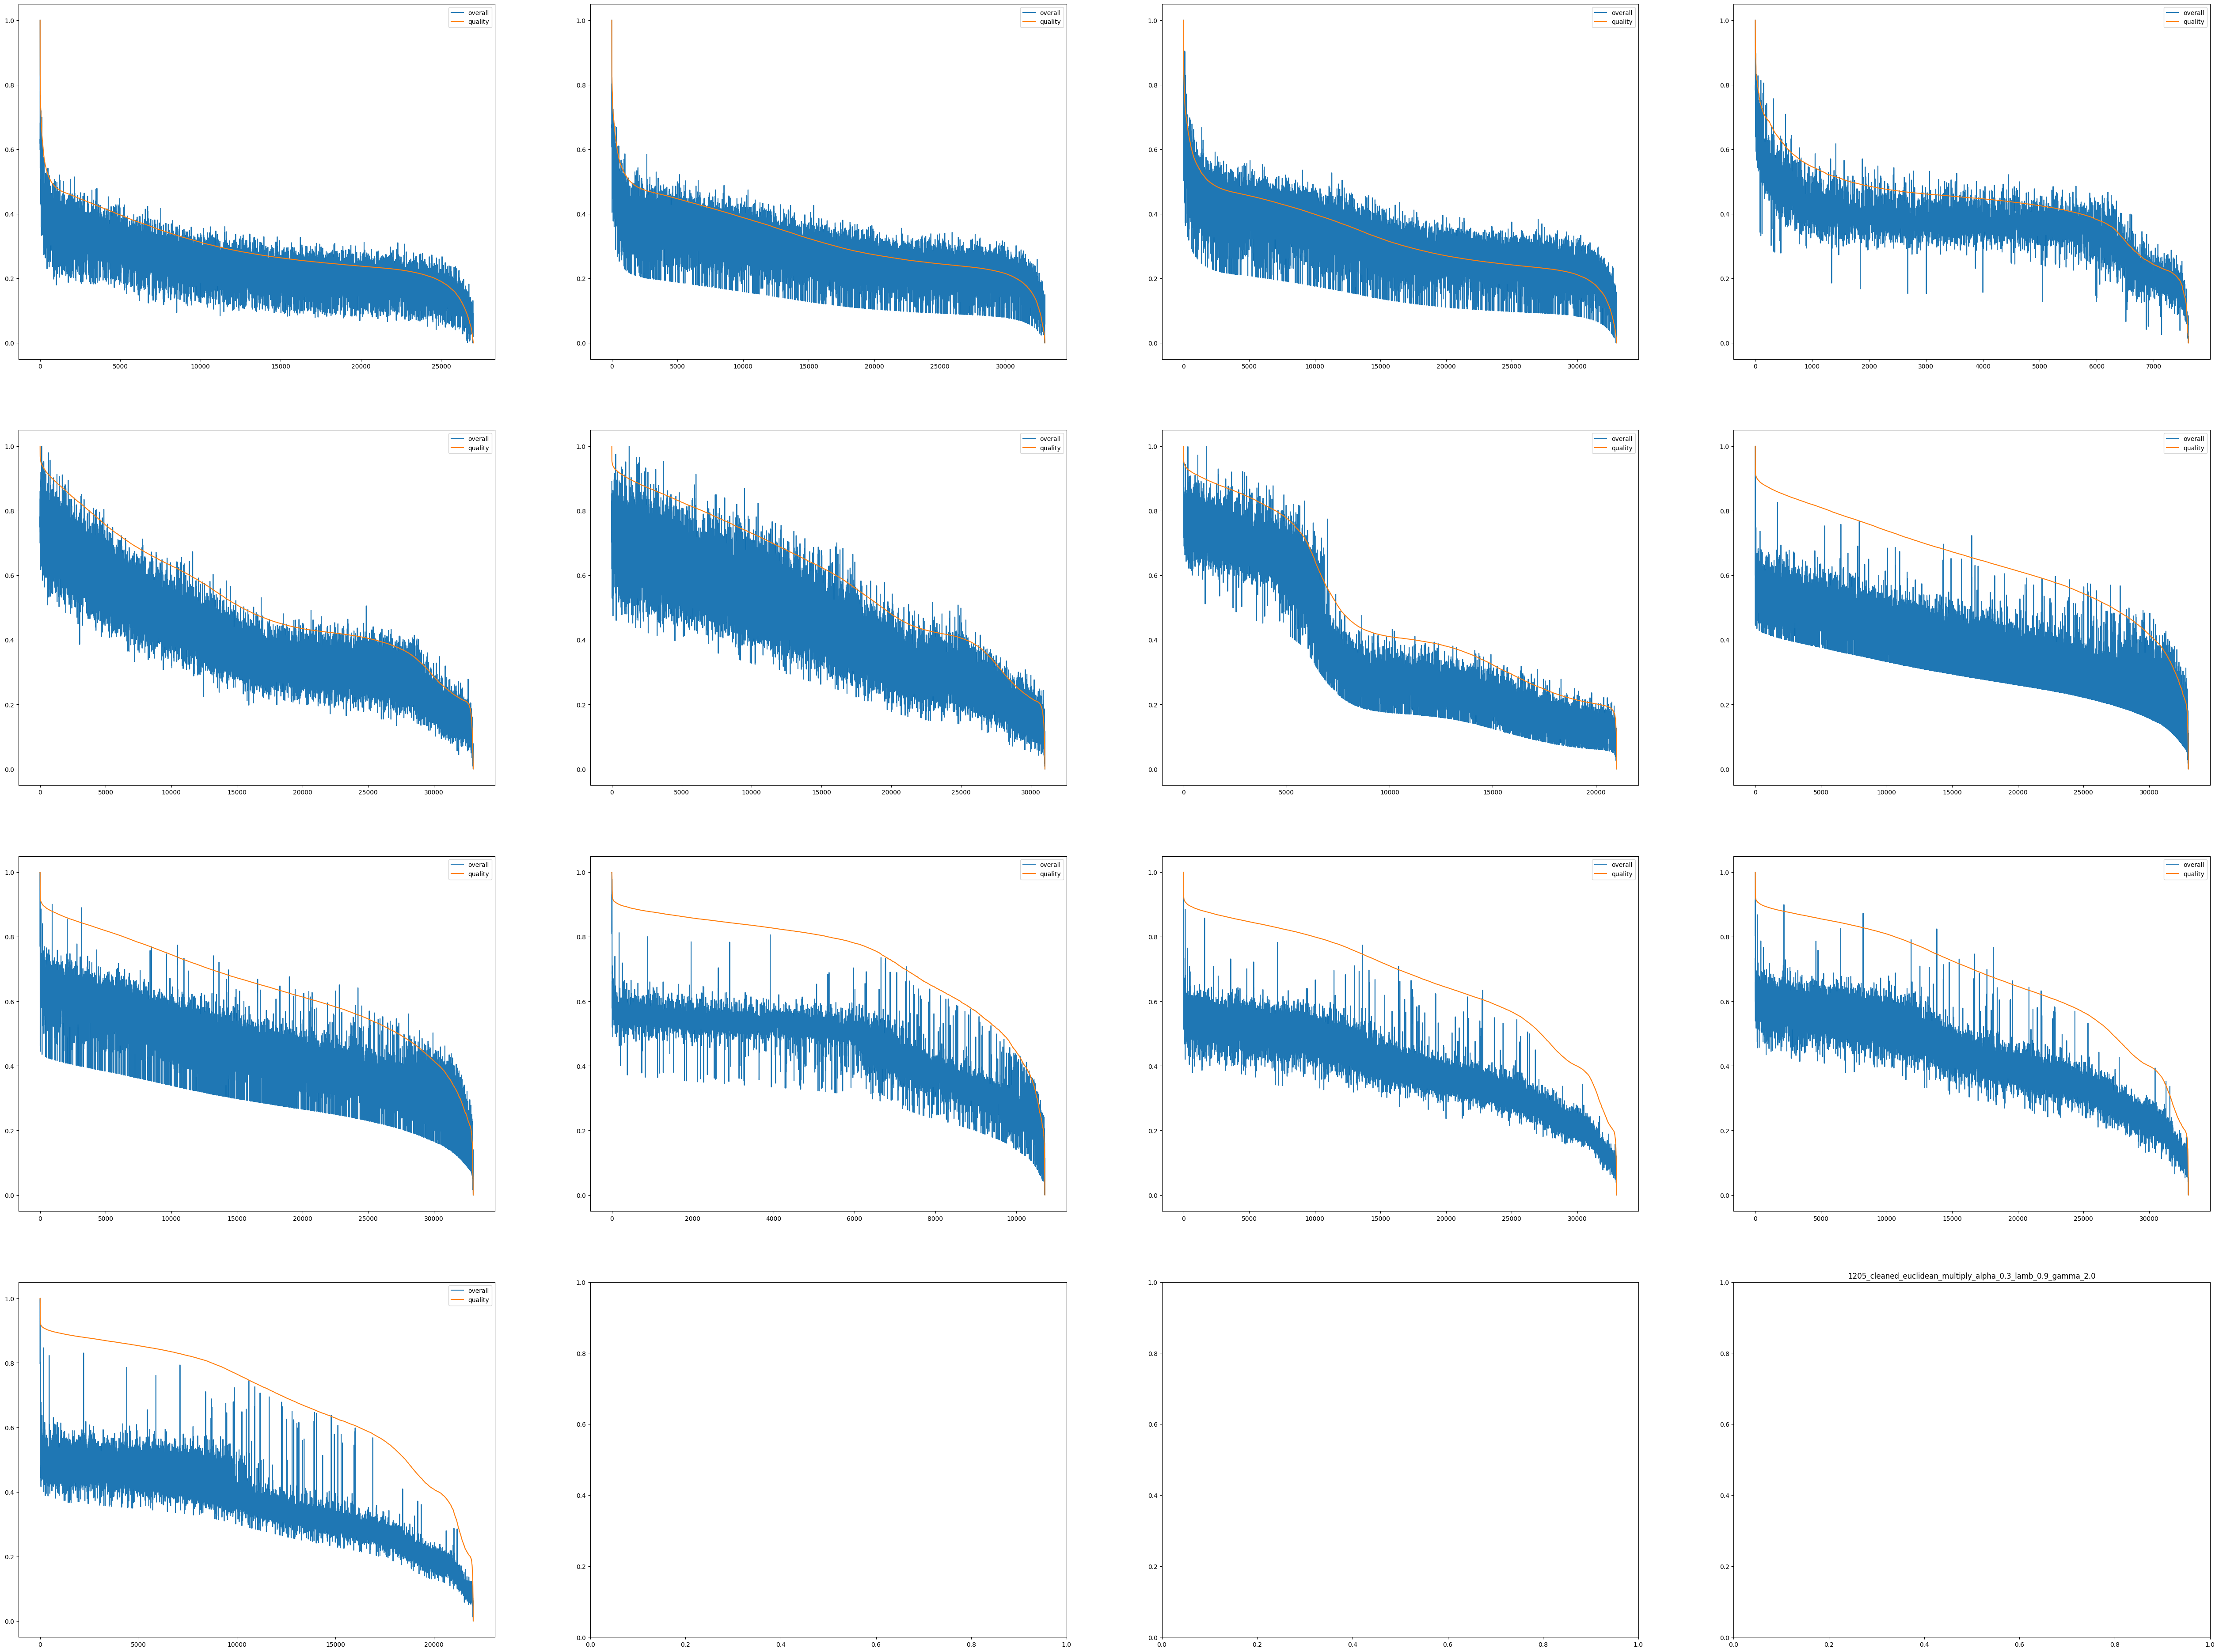

In [11]:
name = "1205_cleaned_euclidean_multiply_alpha_0.3_lamb_0.9_gamma_2.0"
fig, axes = plt.subplots(4, 4, figsize=(16*4, 12*4))
for i in range(13):
    gamma = float(name.split('gamma_')[-1])
    log = torch.load(f"../pool_evolve/ap_logs/{name}/{i}.pth")

    representation = torch.tensor(log['representation'])
    min_value = representation.min() if i == 0 else representation[:6000].min()
    max_value = representation.max()
    scaled_representation_scores = (representation - min_value) / (max_value - min_value)
    scaled_representation_scores[scaled_representation_scores<0]=0

    quality = torch.tensor(log['quality'])
    min_value = quality.min()
    max_value = quality.max()
    scaled_quality_scores = (quality - min_value) / (max_value - min_value)
    sorted_scaled_quality_scores = scaled_quality_scores.sort(descending=True).values
    sorted_scaled_quality_indices = scaled_quality_scores.sort(descending=True).indices

    overall_scores = (1+scaled_representation_scores) * (1+scaled_quality_scores).pow(gamma)
    min_value = overall_scores.min()
    max_value = overall_scores.max()
    scaled_overall_scores = (overall_scores - min_value) / (max_value - min_value)

    # print(spearmanr(overall_scores, representation))
    # print(spearmanr(overall_scores, quality))
    # print("--"*20)

    # print(spearmanr(overall_scores[:6000], representation[:6000]))
    # print(spearmanr(overall_scores[:6000], quality[:6000]))
    # print("--"*20)

    x_values = range(scaled_representation_scores.shape[0])
    # axes[i//4][i%4].plot(x_values, scaled_representation_scores)
    # axes[i//4][i%4].plot(x_values, scaled_quality_scores[sorted_scaled_representation_indices], label='quality')
    axes[i//4][i%4].plot(x_values, scaled_overall_scores[sorted_scaled_quality_indices], label='overall')
    axes[i//4][i%4].plot(x_values, sorted_scaled_quality_scores, label='quality')
    axes[i//4][i%4].legend()
plt.title(name)
plt.show()

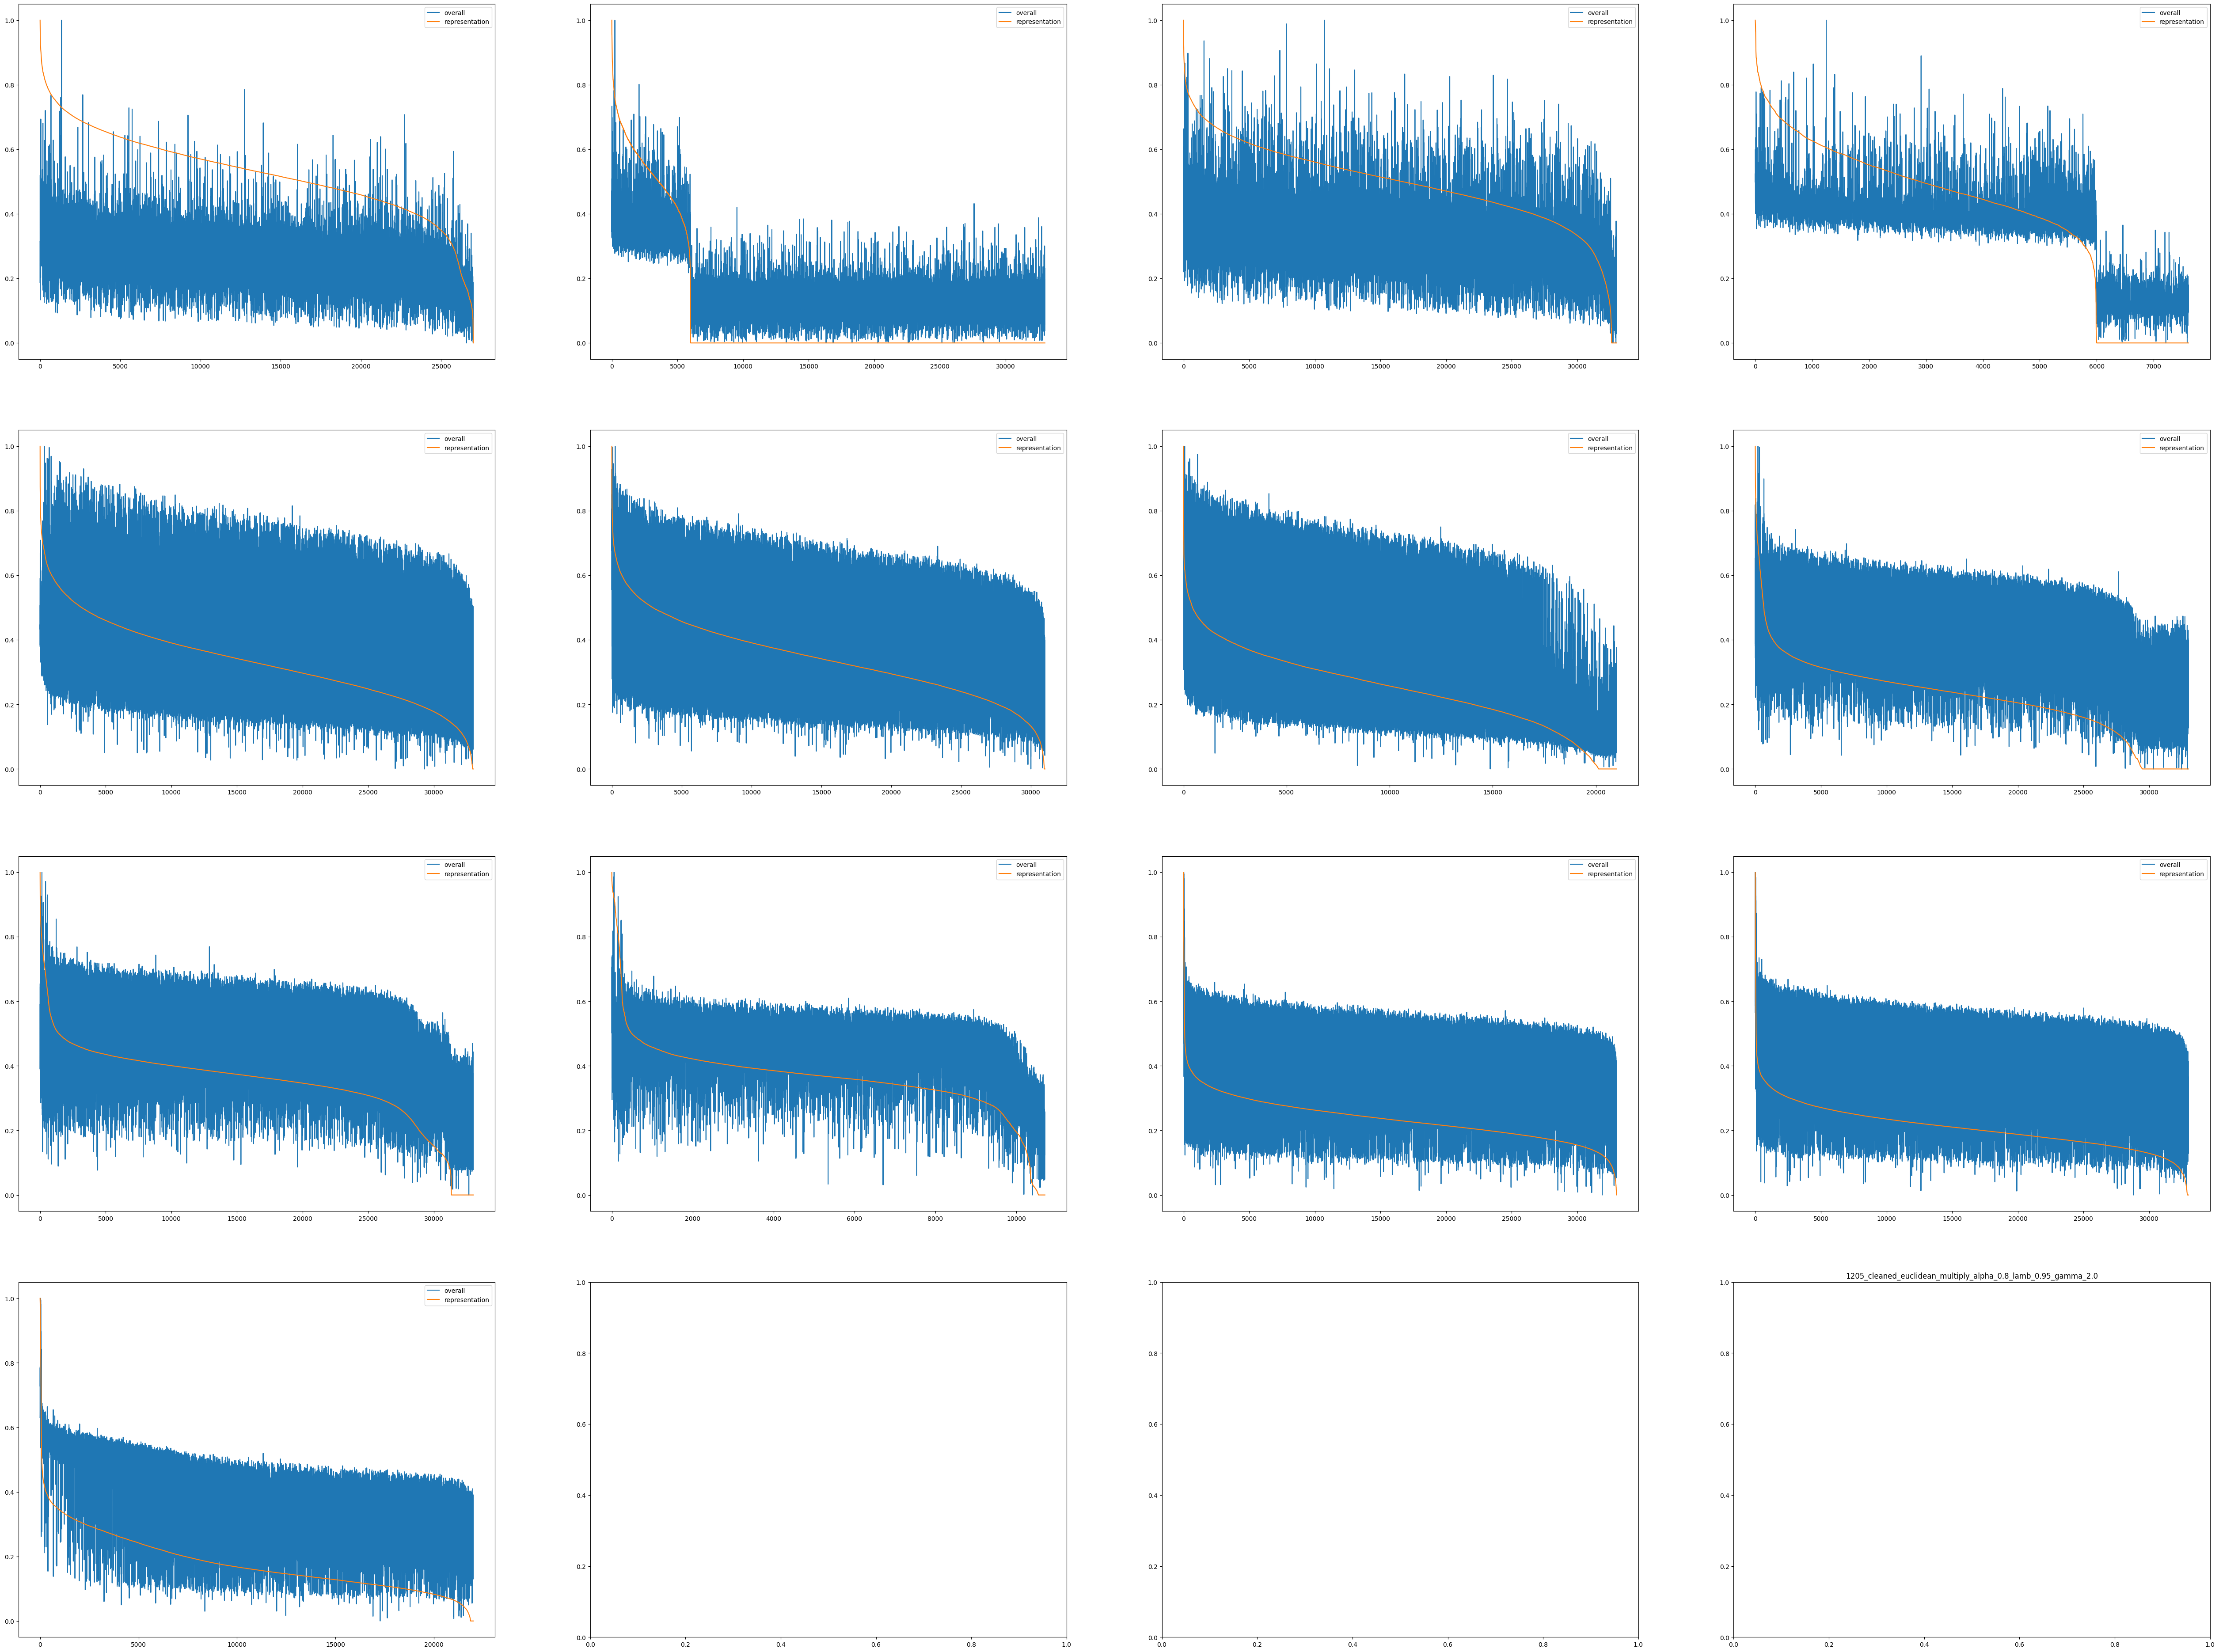

In [12]:
name = "1205_cleaned_euclidean_multiply_alpha_0.8_lamb_0.95_gamma_2.0"
fig, axes = plt.subplots(4, 4, figsize=(16*4, 12*4))
for i in range(13):
    gamma = float(name.split('gamma_')[-1])
    log = torch.load(f"../pool_evolve/ap_logs/{name}/{i}.pth")

    representation = torch.tensor(log['representation'])
    min_value = representation.min() if i == 0 else representation[:6000].min()
    max_value = representation.max()
    scaled_representation_scores = (representation - min_value) / (max_value - min_value)
    scaled_representation_scores[scaled_representation_scores<0]=0

    quality = torch.tensor(log['quality'])
    min_value = quality.min()
    max_value = quality.max()
    scaled_quality_scores = (quality - min_value) / (max_value - min_value)
    sorted_scaled_representation_scores = scaled_representation_scores.sort(descending=True).values
    sorted_scaled_representation_indices = scaled_representation_scores.sort(descending=True).indices

    overall_scores = (1+scaled_representation_scores) * (1+scaled_quality_scores).pow(gamma)
    min_value = overall_scores.min()
    max_value = overall_scores.max()
    scaled_overall_scores = (overall_scores - min_value) / (max_value - min_value)

    # print(spearmanr(overall_scores, representation))
    # print(spearmanr(overall_scores, quality))
    # print("--"*20)
    
    # print(spearmanr(overall_scores[:6000], representation[:6000]))
    # print(spearmanr(overall_scores[:6000], quality[:6000]))
    # print("--"*20)

    x_values = range(scaled_representation_scores.shape[0])
    # axes[i//4][i%4].plot(x_values, scaled_representation_scores)
    # axes[i//4][i%4].plot(x_values, scaled_quality_scores[sorted_scaled_representation_indices], label='quality')
    axes[i//4][i%4].plot(x_values, scaled_overall_scores[sorted_scaled_representation_indices], label='overall')
    axes[i//4][i%4].plot(x_values, sorted_scaled_representation_scores, label='representation')
    axes[i//4][i%4].legend()
plt.title(name)
plt.show()